<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients_Francisco_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Morales Ramírez Ángel Franciso [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

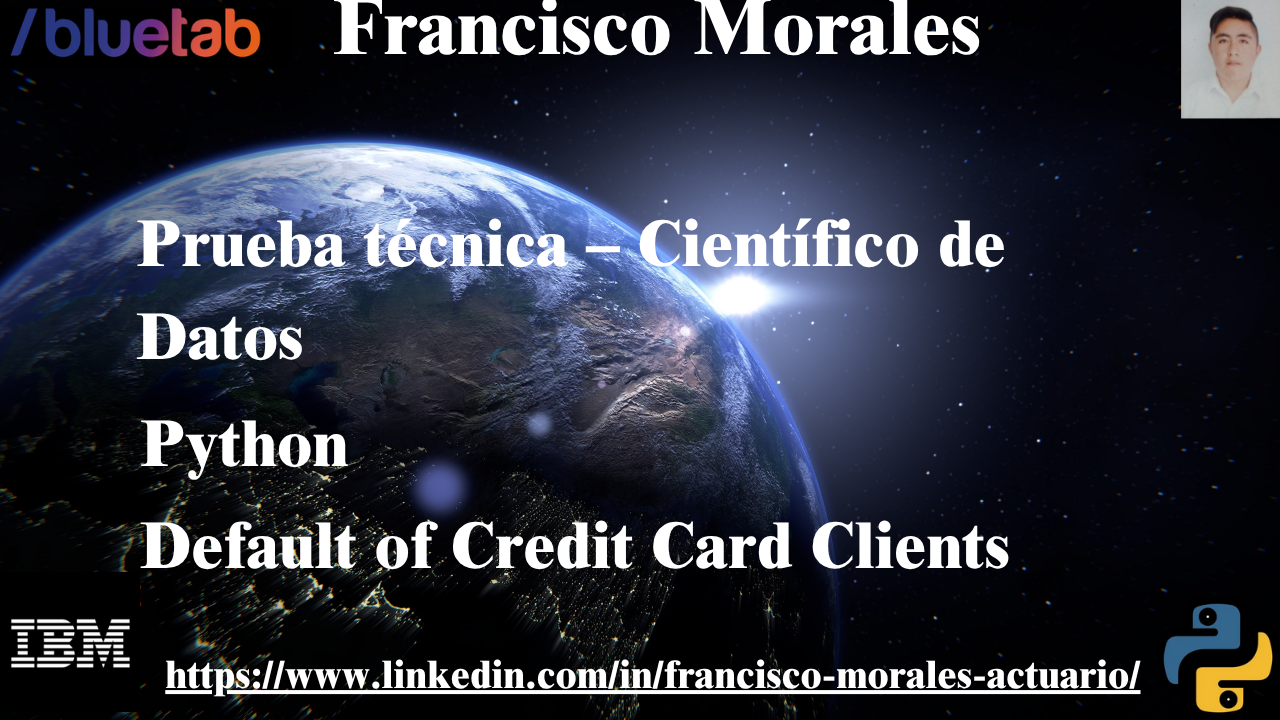

[Fuentes de los datos](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

---
# **Importación de librerías y datos**🐍
---

In [1]:
!pip install catboost

In [2]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning

#Árboles de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Oversampling
from imblearn.over_sampling import SMOTE
#Bosques aleatorios
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix, accuracy_score)
#Calcular curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Modelos Lineales
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#Predicciones
from sklearn import metrics

import statsmodels.api as sm
#Redees neuronales
from sklearn.neural_network import MLPClassifier
#VIF para multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

---
#**Realizar limpieza del dataset**📊
---

In [3]:
#Importación de datos
df =pd.read_excel('https://raw.github.com/FranciscoMoralesActuary/Default-of-Credit-Card-Clients/main/default%20of%20credit%20card%20clients.xls')
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [4]:
df.shape

(30001, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [6]:
#Nombres para la variables
encabezados=df.iloc[0]
#Quitamos la primera fila
df = df[1:]
#Renombramos las columnas
df.columns = encabezados
df.tail()

0         ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
29996  29996    220000   1         3        1  39     0     0     0     0   
29997  29997    150000   1         3        2  43    -1    -1    -1    -1   
29998  29998     30000   1         2        2  37     4     3     2    -1   
29999  29999     80000   1         3        1  41     1    -1     0     0   
30000  30000     50000   1         2        1  46     0     0     0     0   

0      ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
29996  ...     88004     31237     15980     8500    20000     5003     3047   
29997  ...      8979      5190         0     1837     3526     8998      129   
29998  ...     20878     20582     19357        0        0    22000     4200   
29999  ...     52774     11855     48944    85900     3409     1178     1926   
30000  ...     36535     32428     15313     2078     1800     1430     1000   

0     PAY_AMT5 PAY_AMT6 default payment next month  
29996     5000     1000                          0  
29997        0        0                          0  
29998     2000     3100                          1  
29999    52964     1804                          1  
30000     1000     1000                          1  

[5 rows x 25 columns]

---
## **Conversión a variables númericas** 🔢
---

In [7]:
#Convertir a variables numéricas
for i in encabezados:
  df[i] = pd.to_numeric(df[i], errors='coerce')

/tmp/ipython-input-7-1878179477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_numeric(df[i], errors='coerce')


In [8]:
#Confirmar vairables numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#Descripción de los datos
df.describe()

0                ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

0               AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

0      ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

0          PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

0           PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

---
## **Variables Irrelevantes**🧼
---

In [10]:
#Eliminar variables irrelevantes
df.drop('ID', axis=1, inplace=True)

---
## **Duplicados**🔁
---

In [11]:
df.drop_duplicates(inplace = True)

---
## **Valores Nulos**🛠️
---

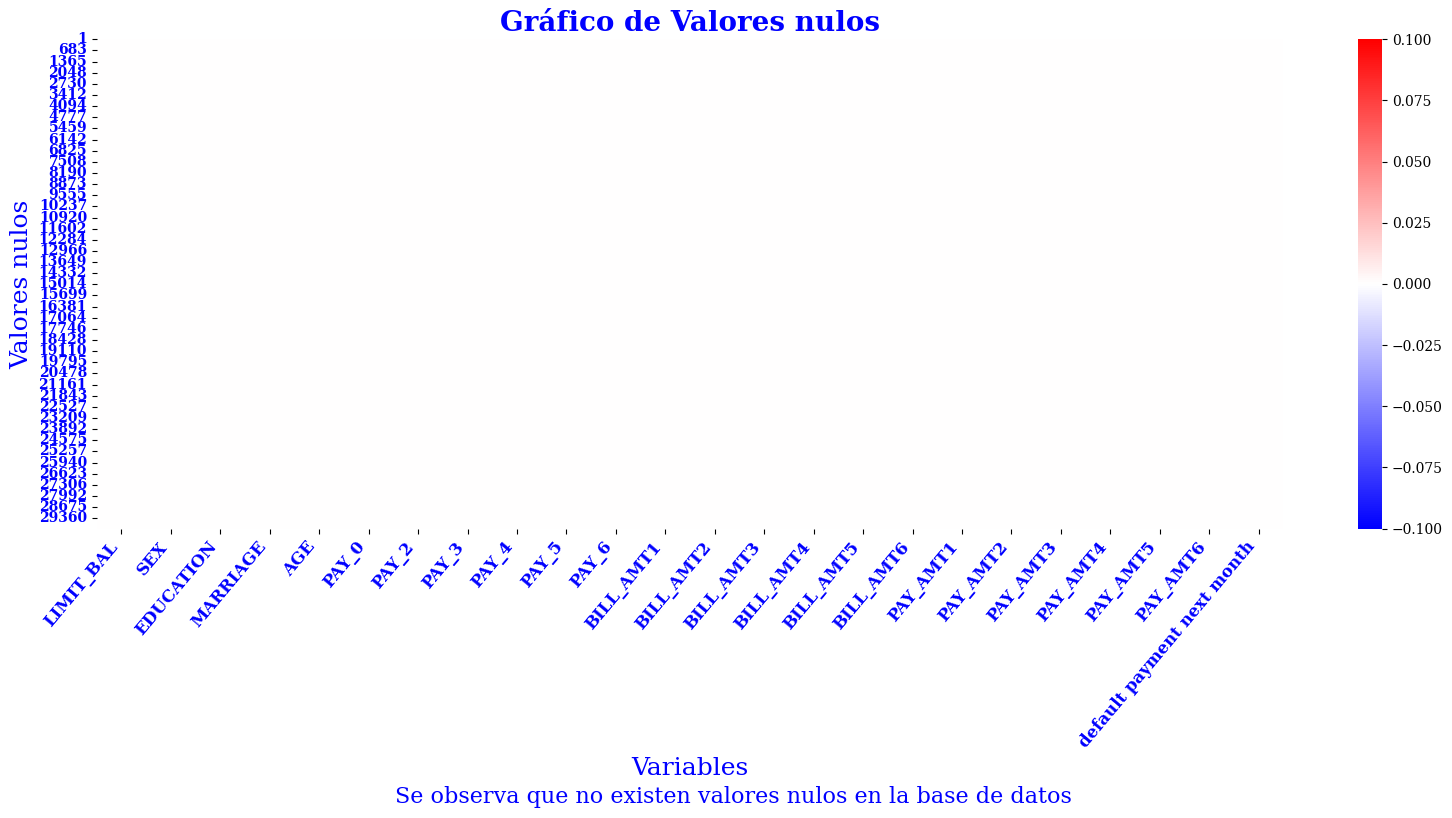

In [12]:
plt.figure(figsize=(16,8), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'
sns.heatmap(df.isnull(), cmap='bwr')
plt.title('Gráfico de Valores nulos',
          fontsize=20, color='blue', fontweight='bold')

plt.xticks(fontsize=12, color='blue',
           rotation=50, ha='right',fontweight='bold')
plt.yticks(fontsize=10, color='blue', fontweight='bold')

plt.xlabel('Variables',fontsize = 18, color = 'blue')

plt.ylabel('Valores nulos',fontsize = 18, color = 'blue')

plt.figtext(0.25, -0.01, "Se observa que no existen valores nulos "
            "en la base de datos",
            fontsize = 16, color='blue')

plt.tight_layout()
plt.show()

In [13]:
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
df.isnull().sum().sum()

np.int64(0)

---
## **Outliners**🚨
---

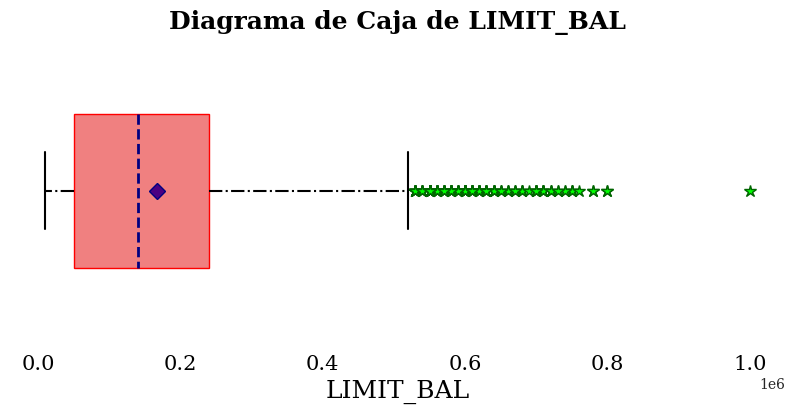

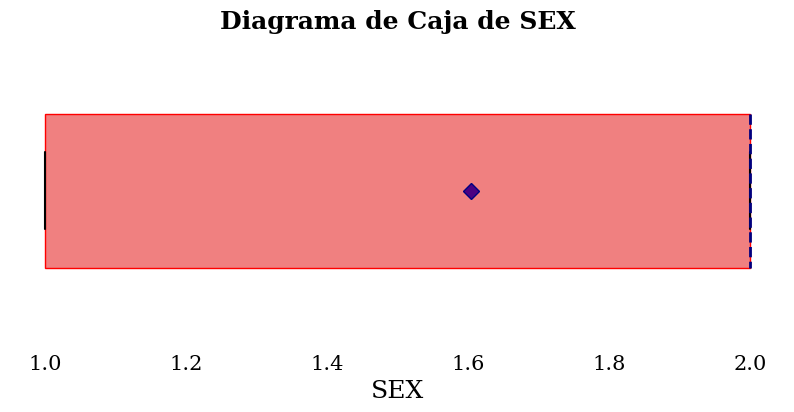

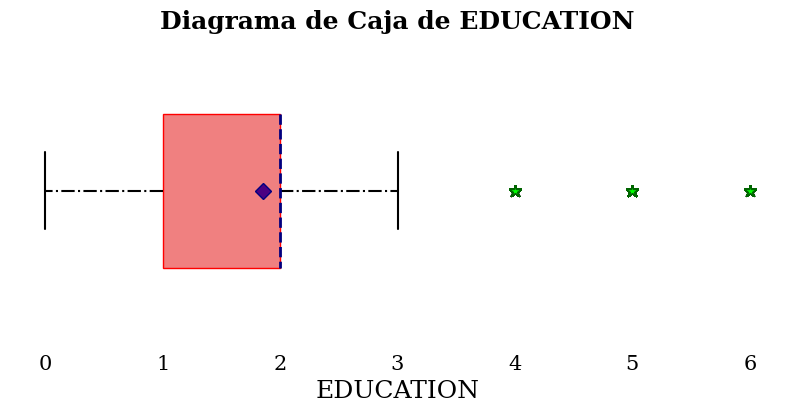

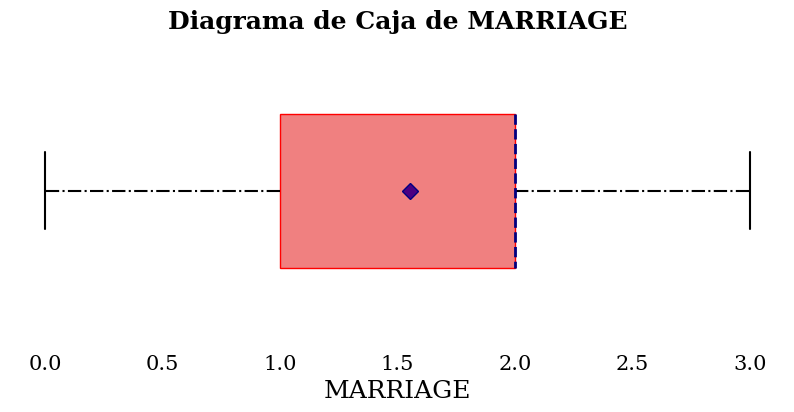

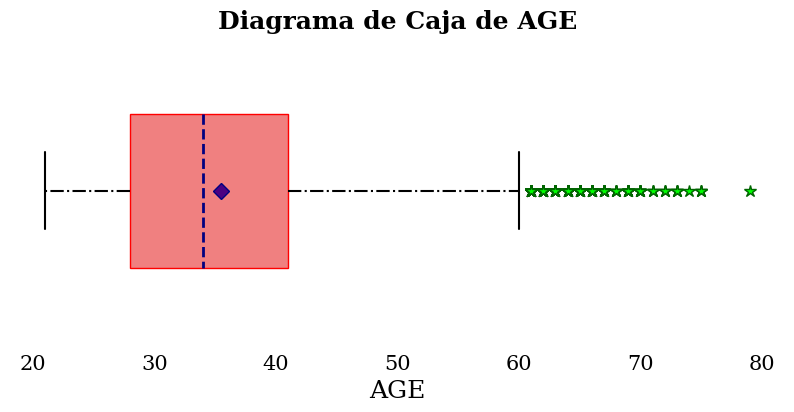

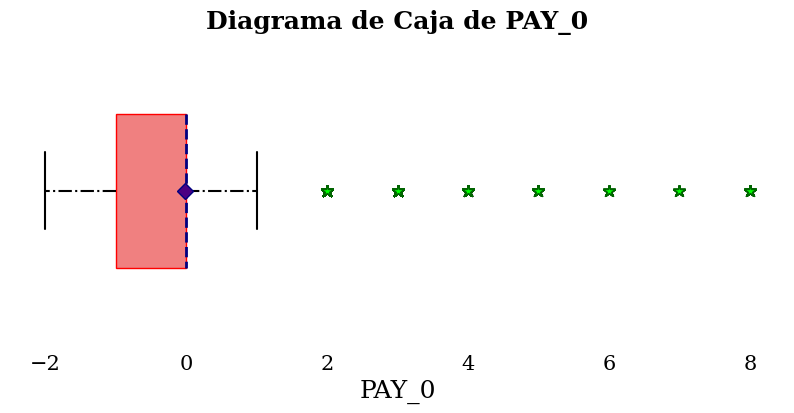

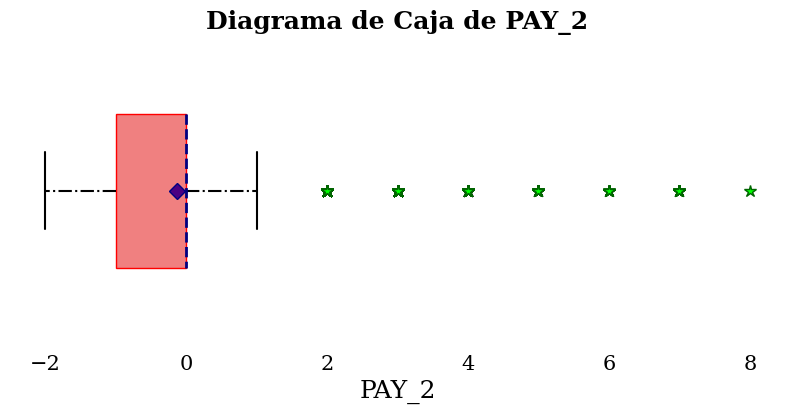

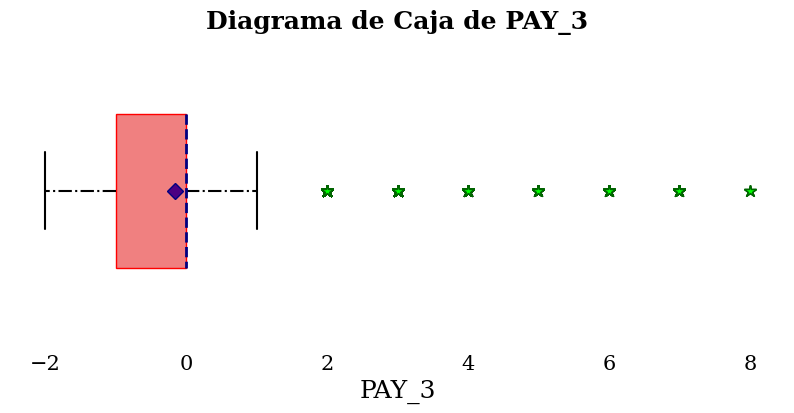

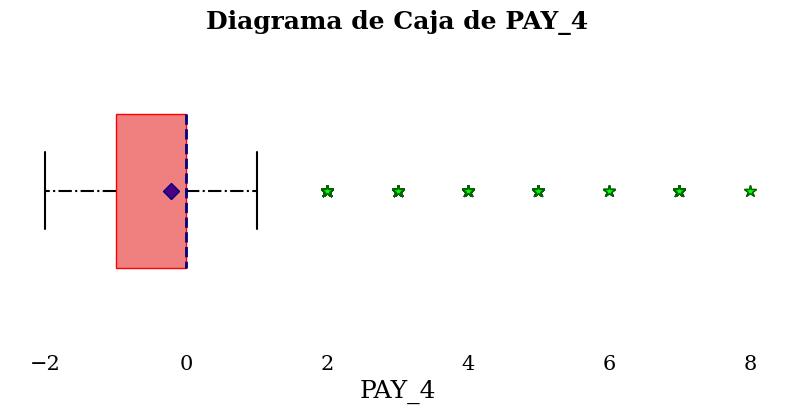

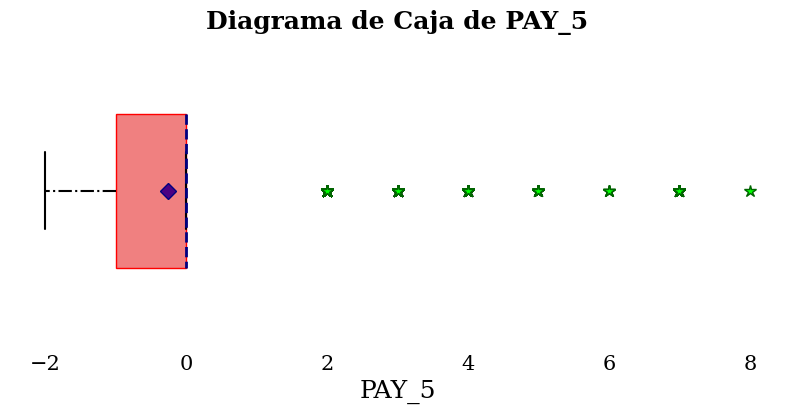

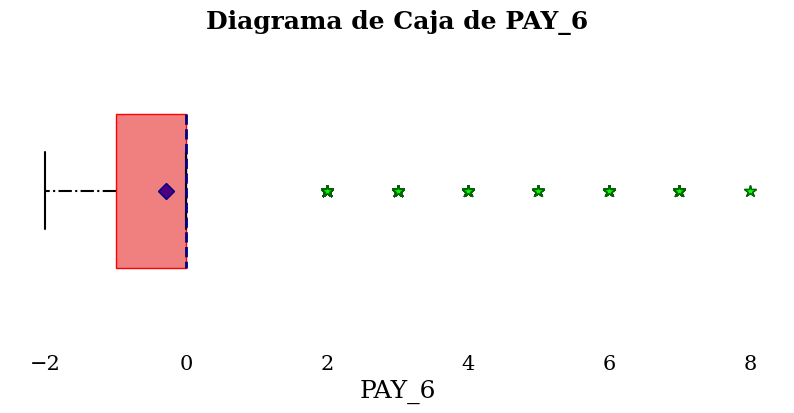

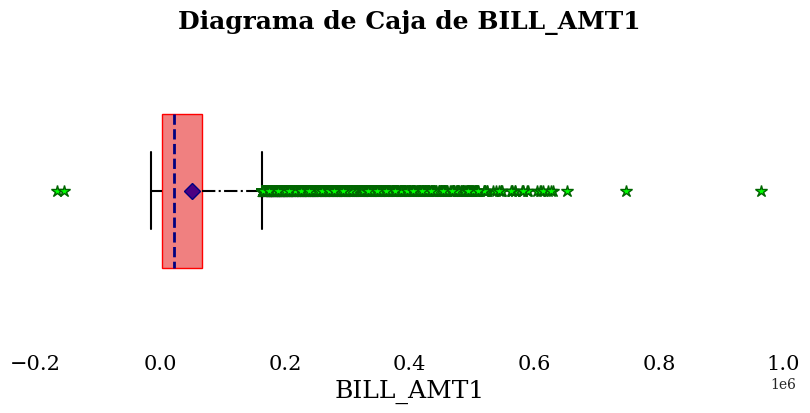

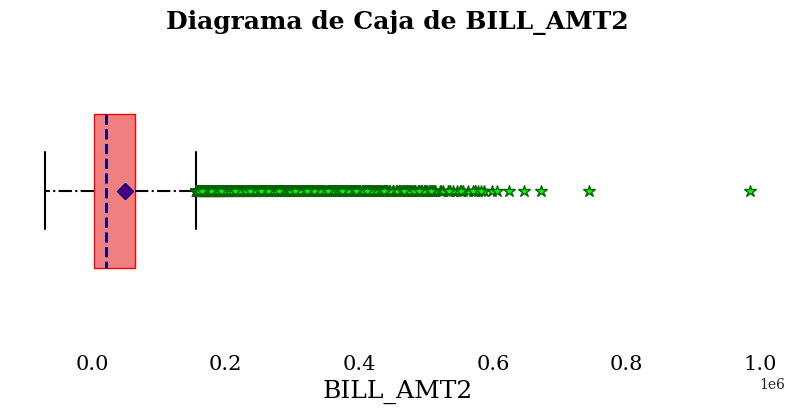

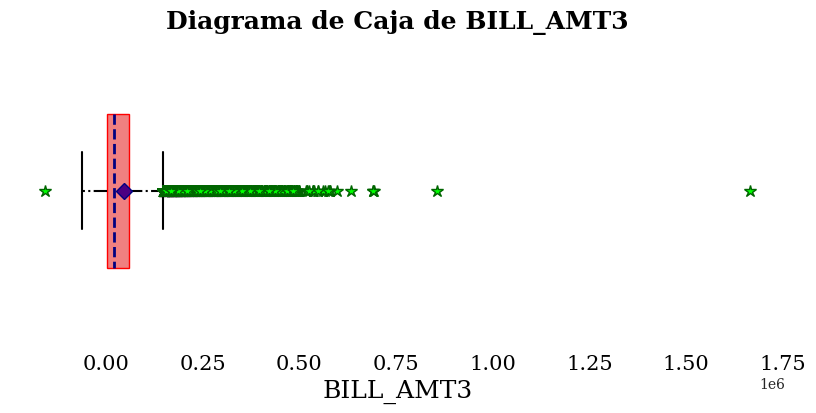

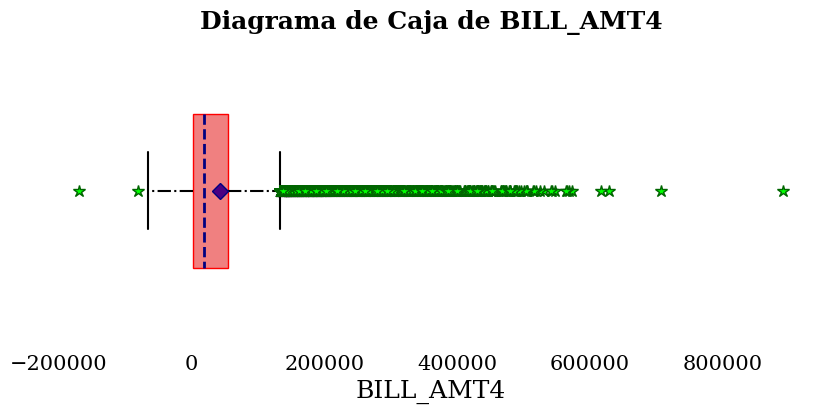

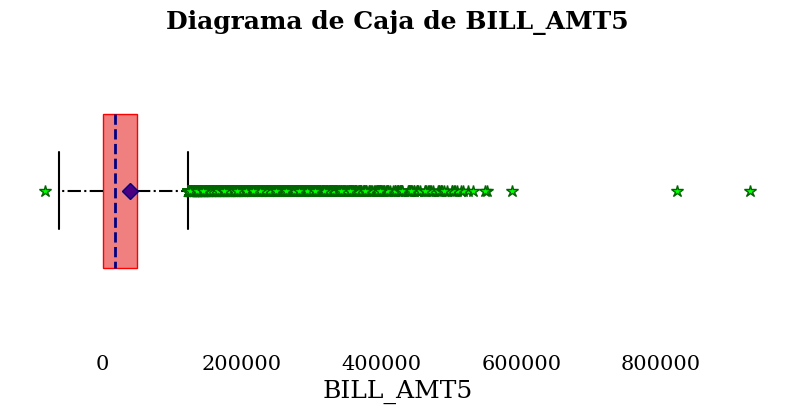

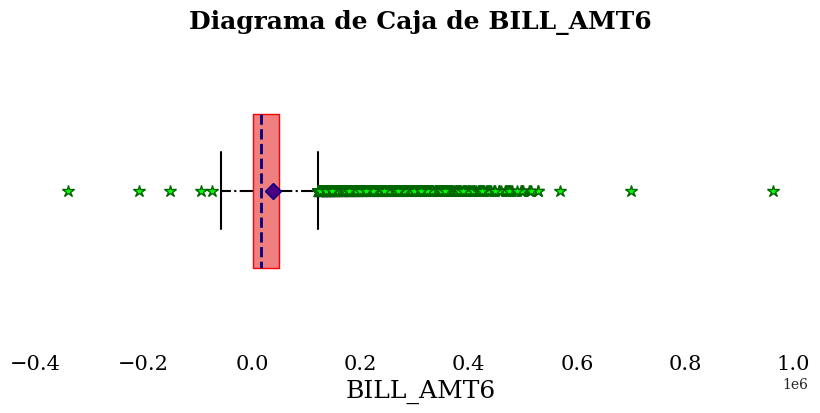

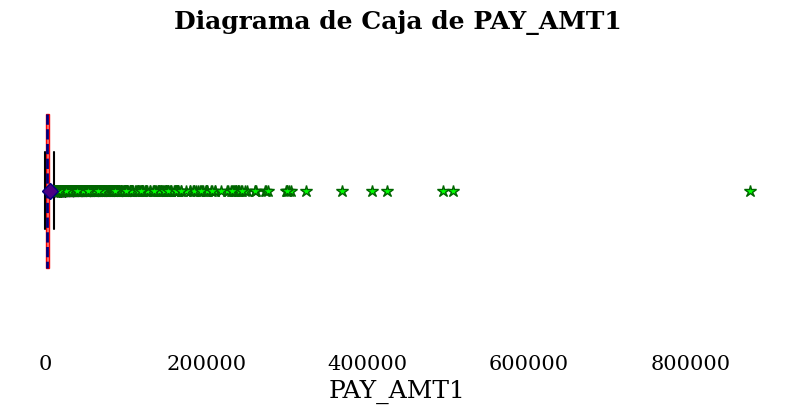

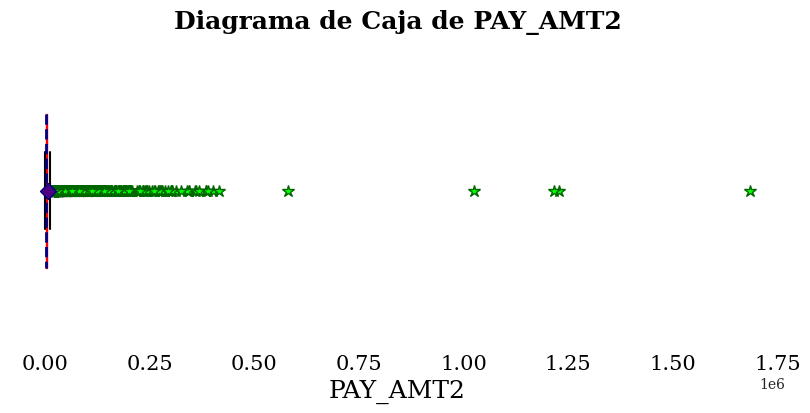

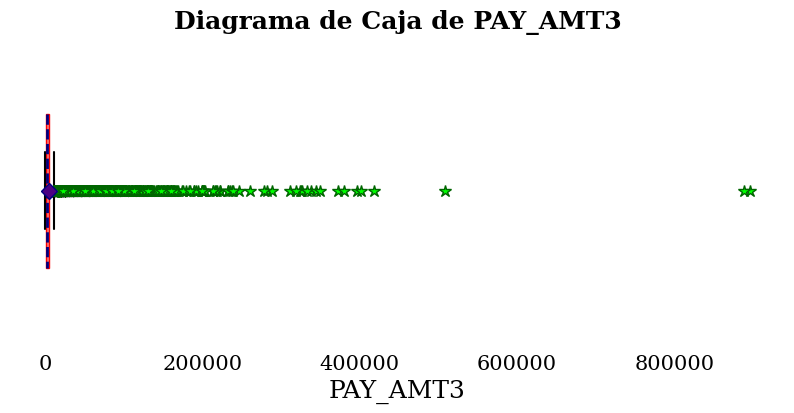

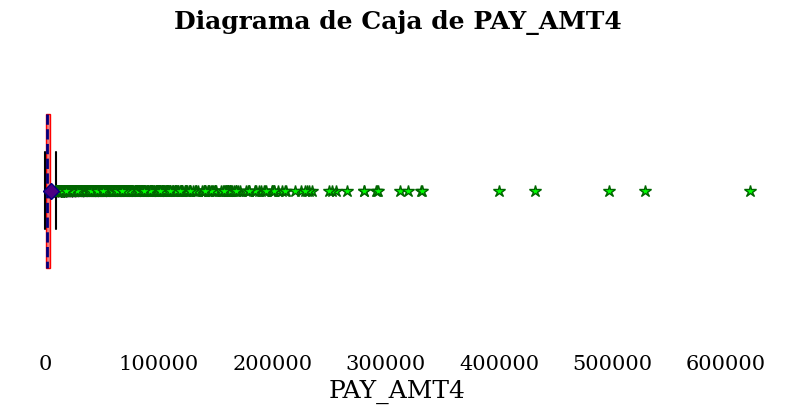

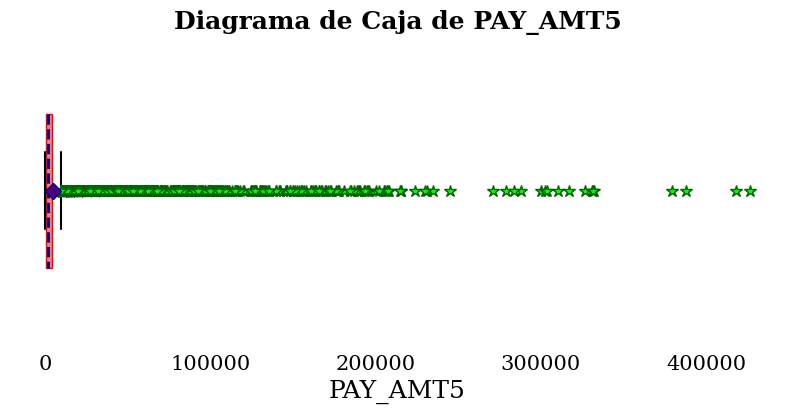

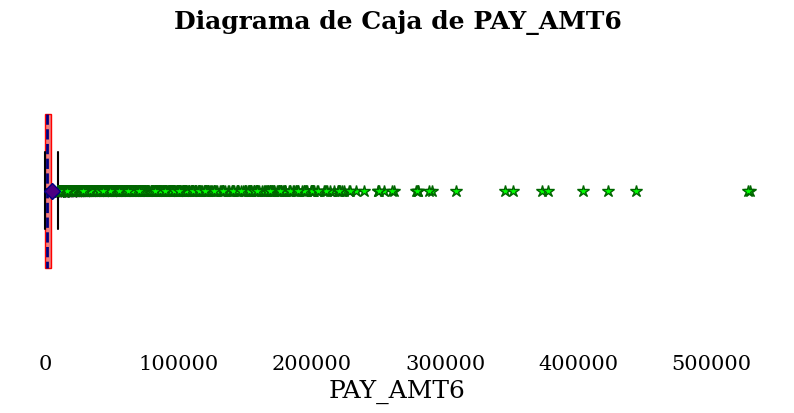

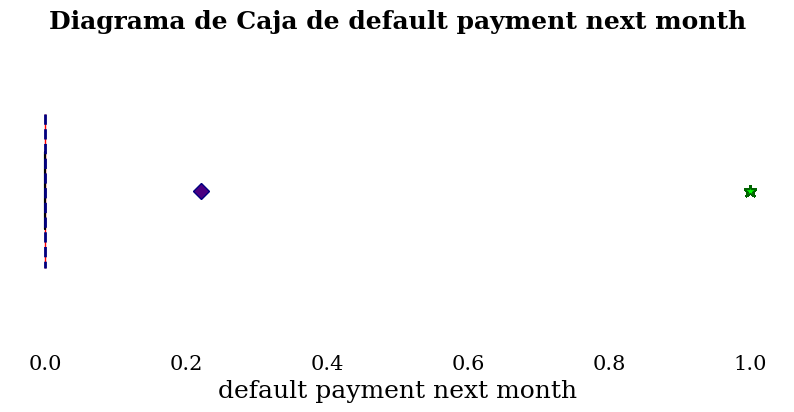

In [15]:
for i in df.columns:
  plt.figure(figsize=(10,4), facecolor='white')
  sns.set_style("white")
  plt.rcParams['font.family'] = 'DejaVu Serif'
  grafica= sns.boxplot(data=df, x=df[i],showmeans=True, width=0.5,

              boxprops=dict(facecolor='lightcoral', edgecolor='red'),

              whiskerprops=dict(color='black',linewidth=1.5,linestyle='dashdot'),

              capprops=dict(color='black',linewidth=1.5,linestyle='solid'),

              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='darkgreen'),

              medianprops=dict(color='navy', linewidth=2,linestyle="dashed"),

              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='indigo', markeredgecolor='navy')
              )

  plt.gca().spines['top'].set_visible(False)

  plt.gca().spines['right'].set_visible(False)

  plt.gca().spines['left'].set_visible(False)

  plt.gca().spines['bottom'].set_visible(False)

  grafica.set_facecolor('white')

  plt.title(f'Diagrama de Caja de {i}',
            fontsize=18, color='black', fontweight='bold')

  plt.xticks(fontsize=15, color='black')

  plt.xlabel(i, fontsize=18, color='black')

  plt.show()

---
## **Correlación**🗃️
---

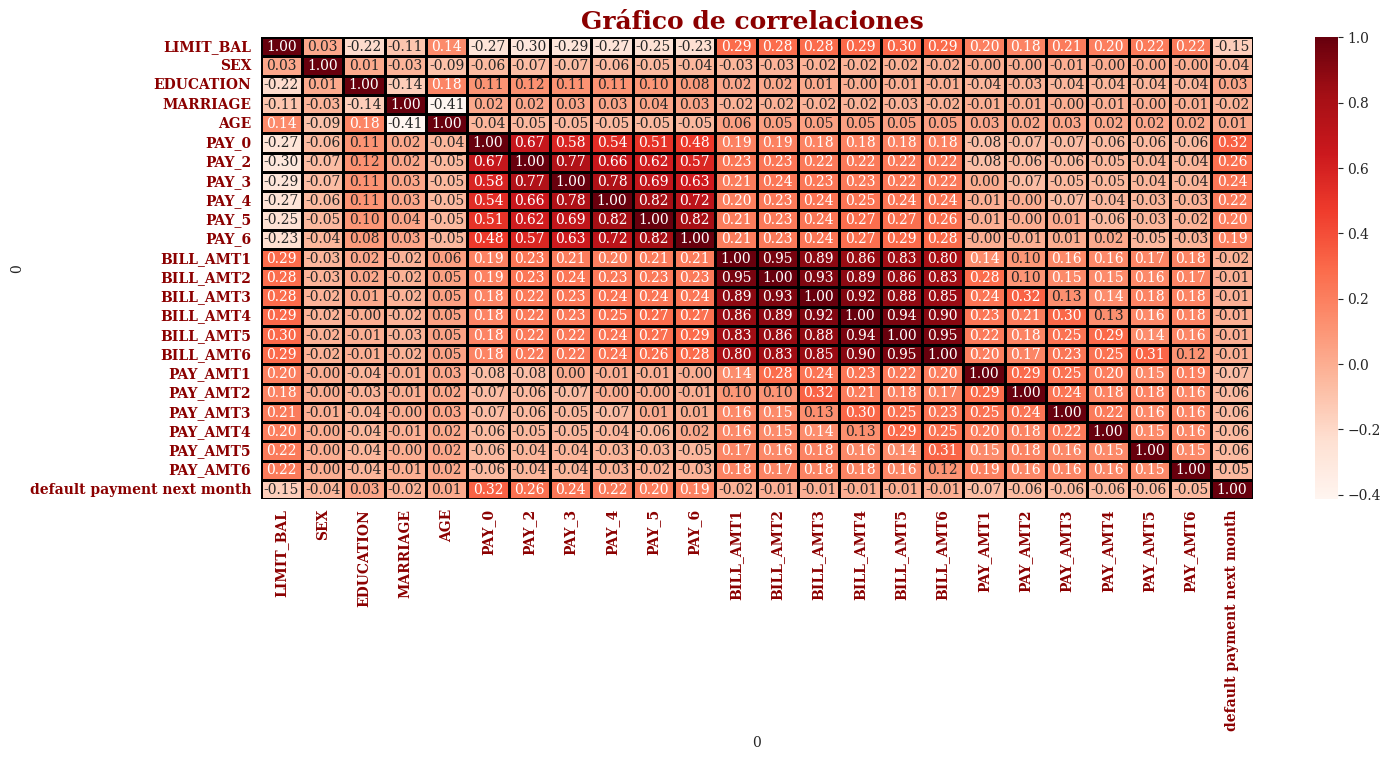

In [16]:
# Gráfico de correlación
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Ejes
plt.xticks(fontsize=10, color='darkred',fontweight='bold')
plt.yticks(fontsize=10, color='darkred',fontweight='bold')
#Titulo
plt.title('Gráfico de correlaciones ',
          fontsize = 18, color = 'darkred',fontweight='bold')
#Gráfico
grafica.set_facecolor("white")
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap='Reds',
    linewidths=1,
    annot_kws={"size": 10},
    linecolor='black'
    )
#Texto

plt.show()

In [17]:
dfl=df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_5','PAY_6','BILL_AMT5','BILL_AMT6','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

In [18]:
#Eliminar la columna "is_claim" para hacer el análisis de multicolinealidad
d_VIF = dfl.drop(columns=['PAY_AMT4'])

In [19]:
#Se crea un dataframe vacio
vif_data = pd.DataFrame()
#Columnas variables con los encabezados de d_VIF
vif_data["variables"] = d_VIF.columns
#Calculo del VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(d_VIF.values, i) for i in range(d_VIF.shape[1])]
#Ordenar de manera ascente el valor de VIF
eliminar=vif_data.sort_values(by='VIF', ascending=True)
eliminar

variables        VIF
10   PAY_AMT6   1.232020
9    PAY_AMT5   1.742090
5       PAY_5   3.239988
6       PAY_6   3.300000
0   LIMIT_BAL   3.746370
3    MARRIAGE   6.248251
2   EDUCATION   6.672774
1         SEX   9.065713
4         AGE  10.832085
7   BILL_AMT5  19.728021
8   BILL_AMT6  20.611850

In [20]:
#Clasificamos las variables según su VIF
vif_mayor_5 = vif_data[vif_data["VIF"] > 5]

In [21]:
#Variables a eliminiar
var=vif_mayor_5['variables'].tolist()
var

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT5', 'BILL_AMT6']

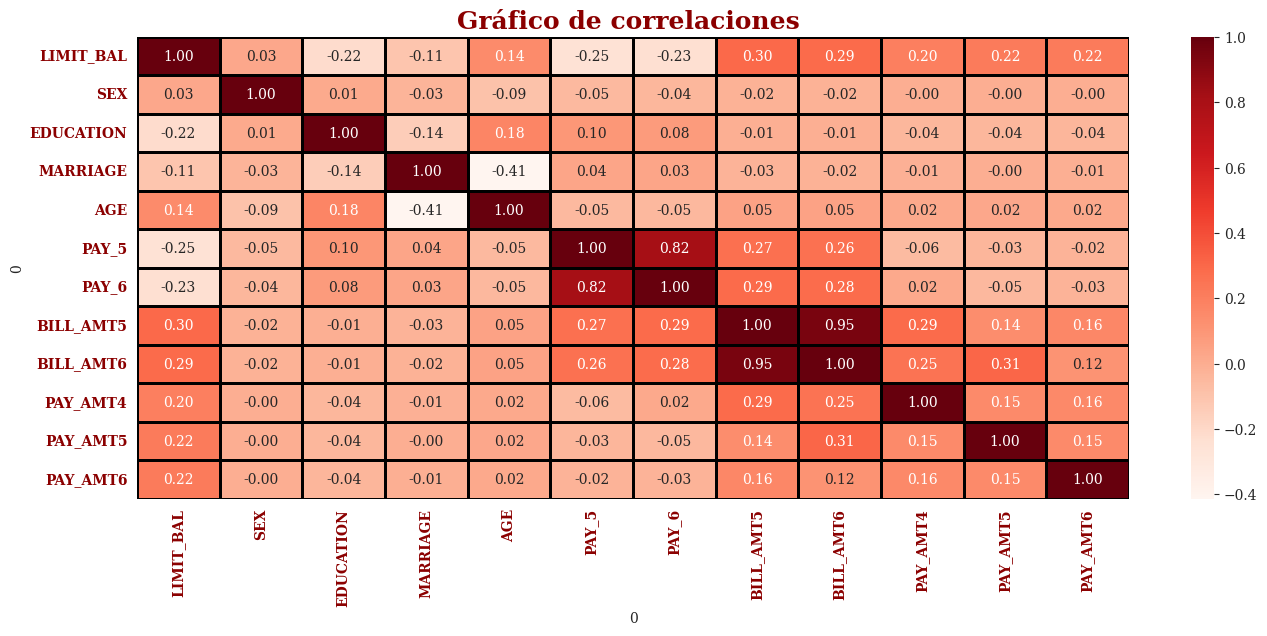

In [22]:
# Gráfico de correlación
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Ejes
plt.xticks(fontsize=10, color='darkred',fontweight='bold')
plt.yticks(fontsize=10, color='darkred',fontweight='bold')
#Titulo
plt.title('Gráfico de correlaciones ',
          fontsize = 18, color = 'darkred',fontweight='bold')
#Gráfico
grafica.set_facecolor("white")
sns.heatmap(
    dfl.corr(),
    annot=True,
    fmt=".2f",
    cmap='Reds',
    linewidths=1,
    annot_kws={"size": 10},
    linecolor='black'
    )
#Texto

plt.show()

---
#**Proceso de análisis exploratorio de los datos**📋
---

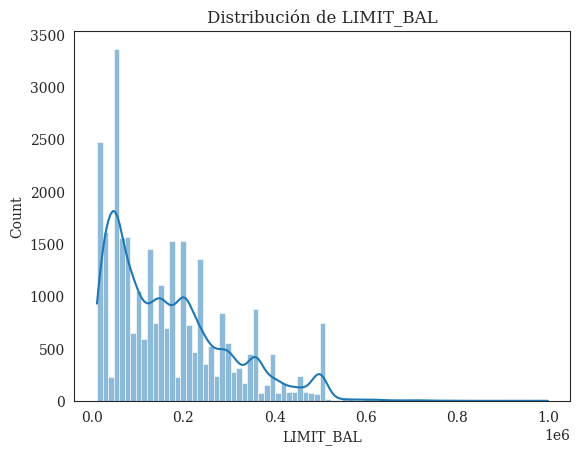

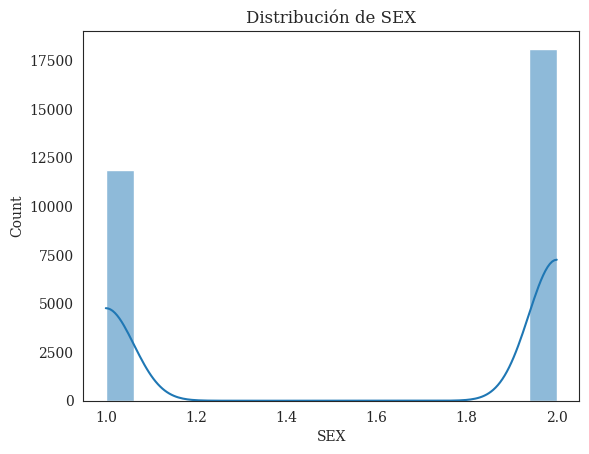

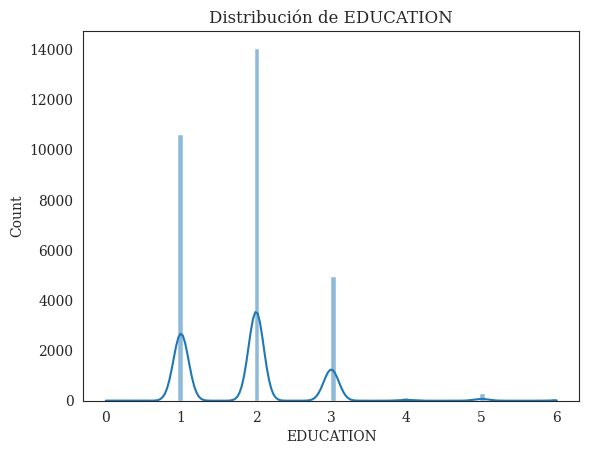

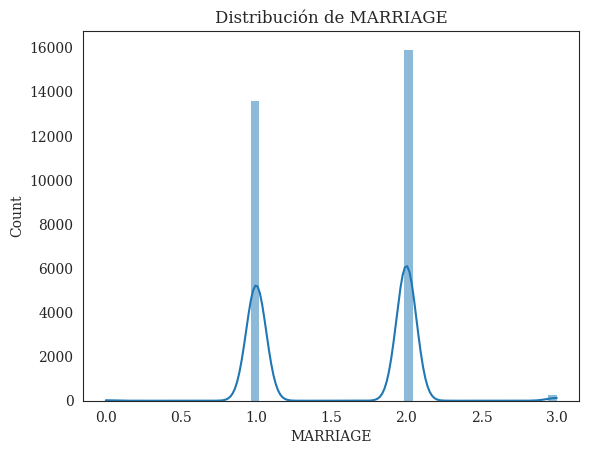

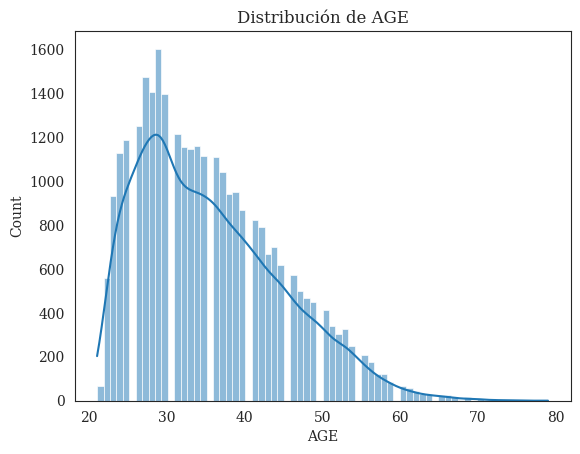

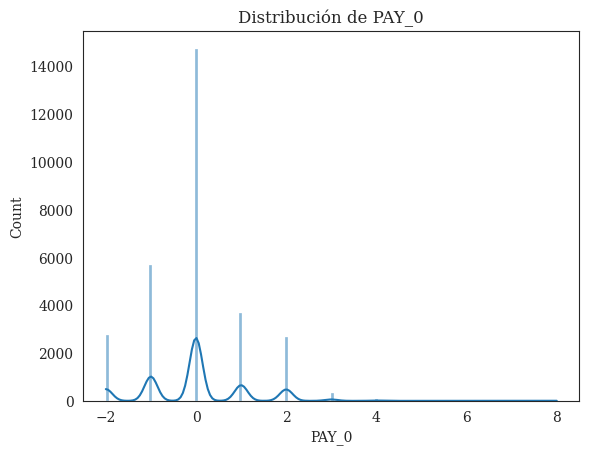

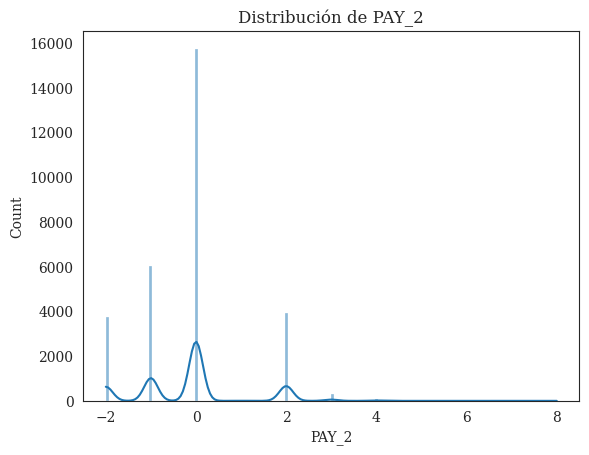

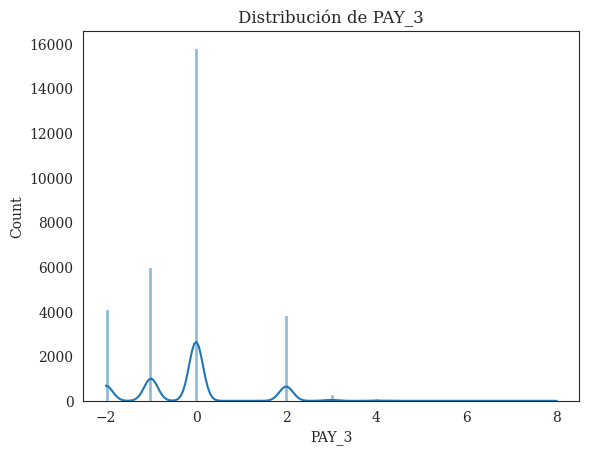

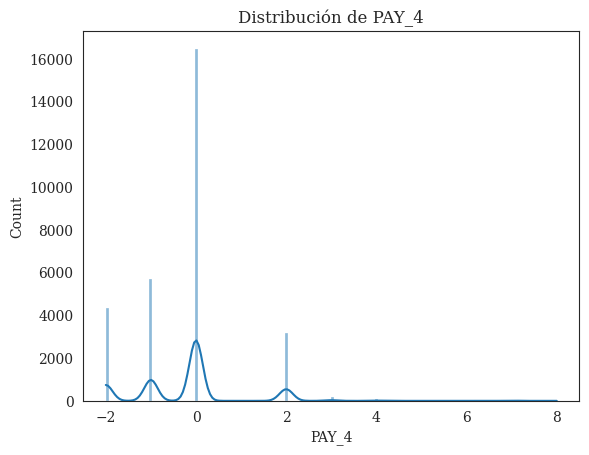

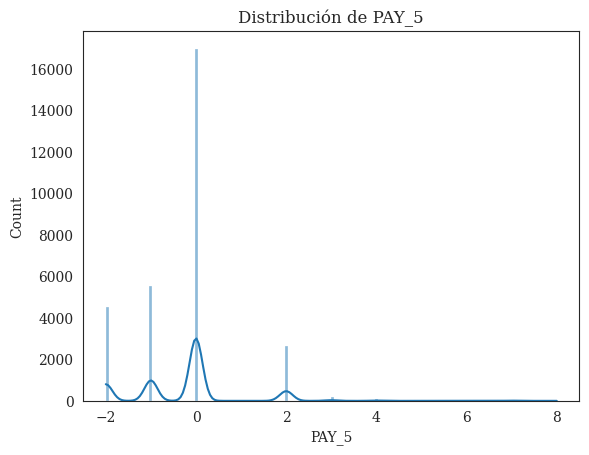

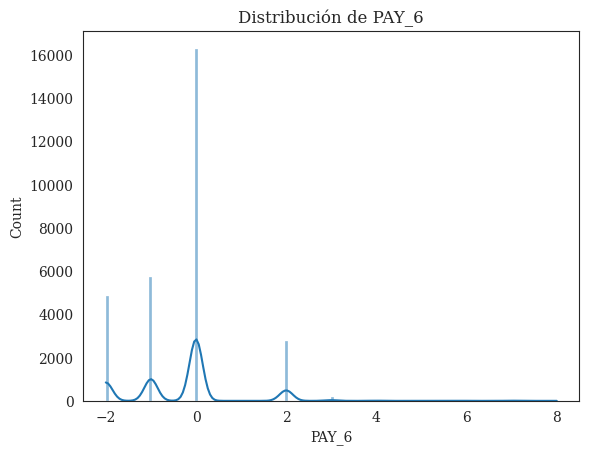

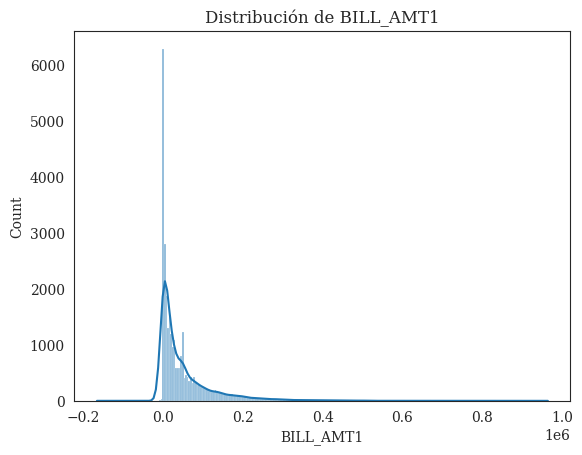

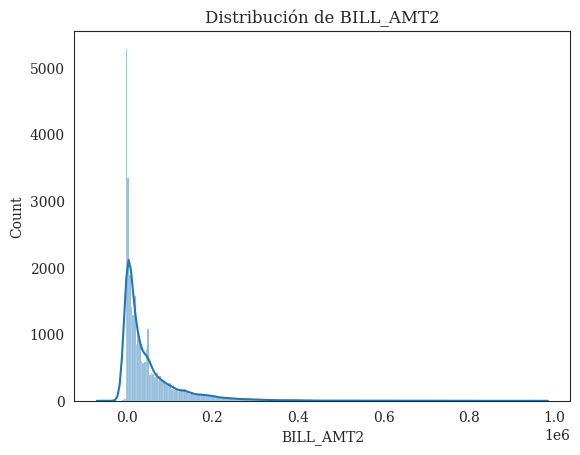

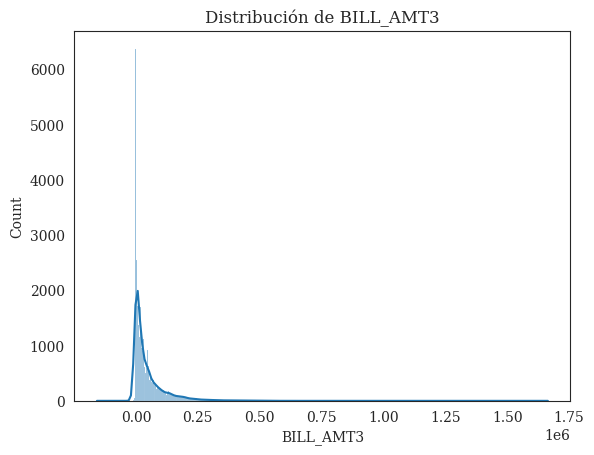

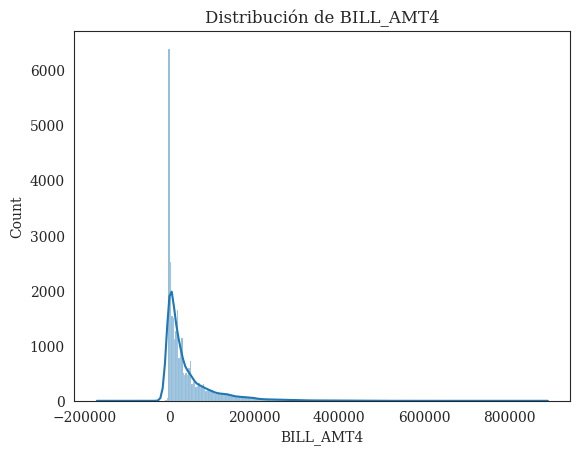

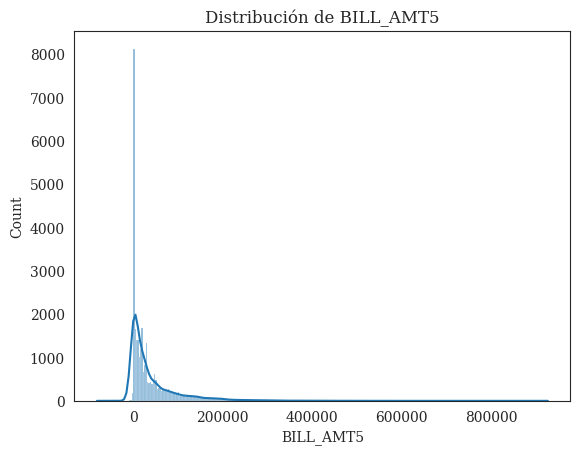

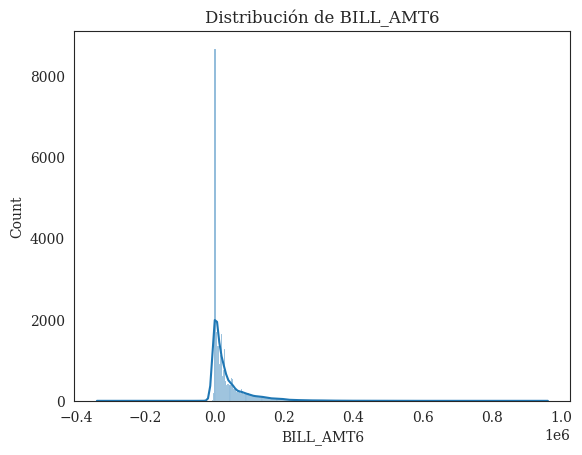

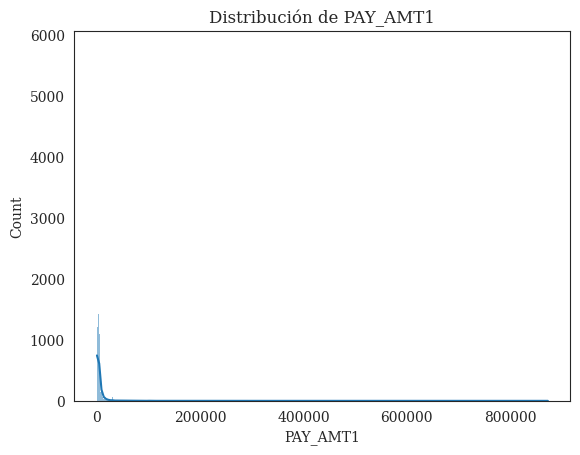

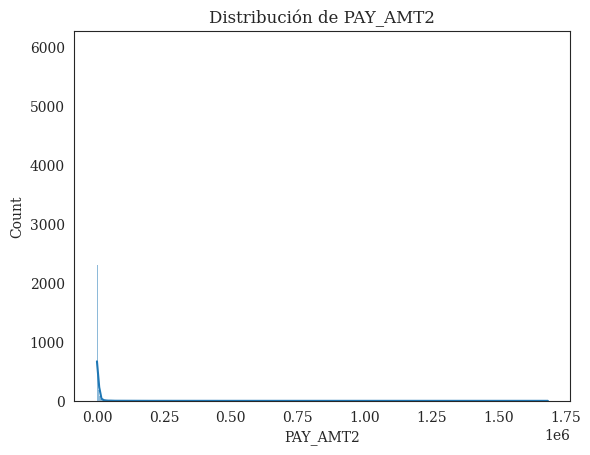

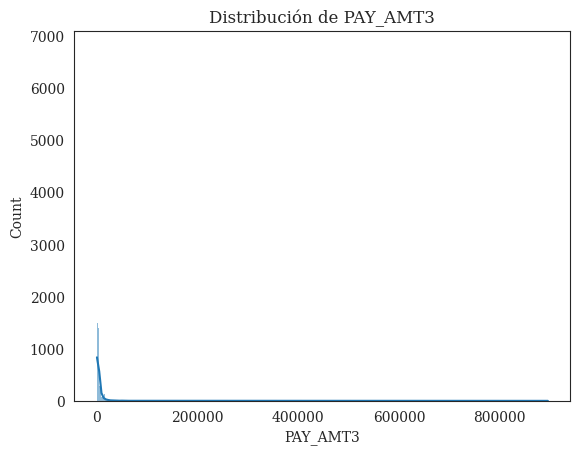

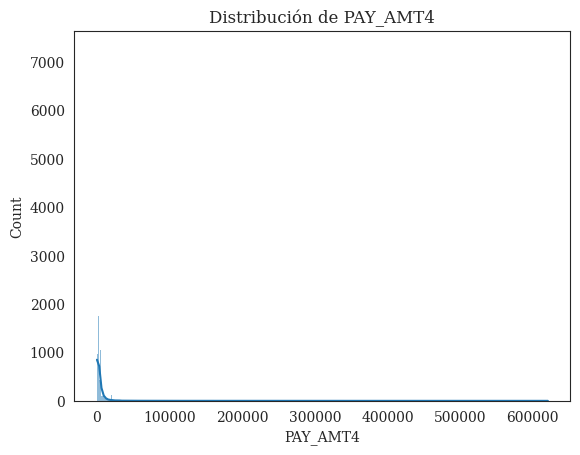

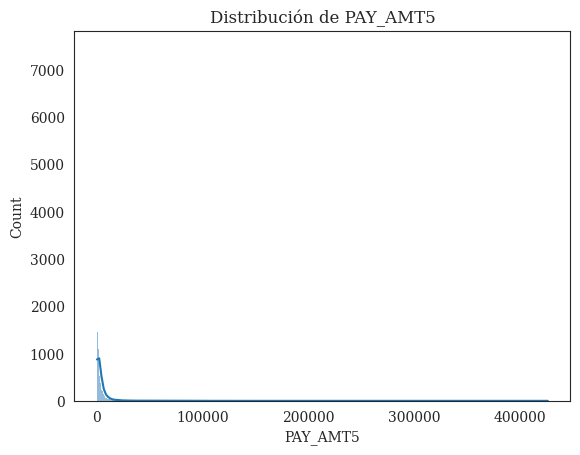

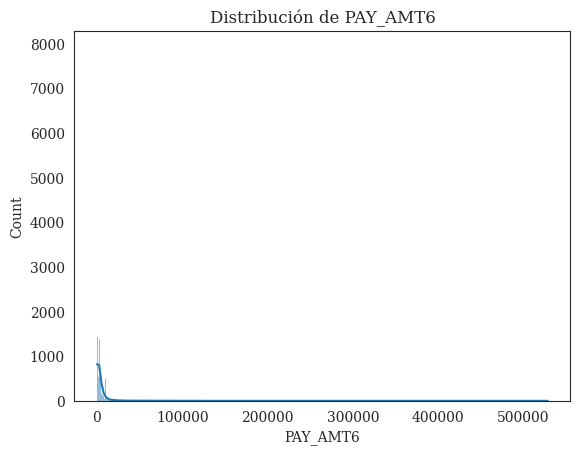

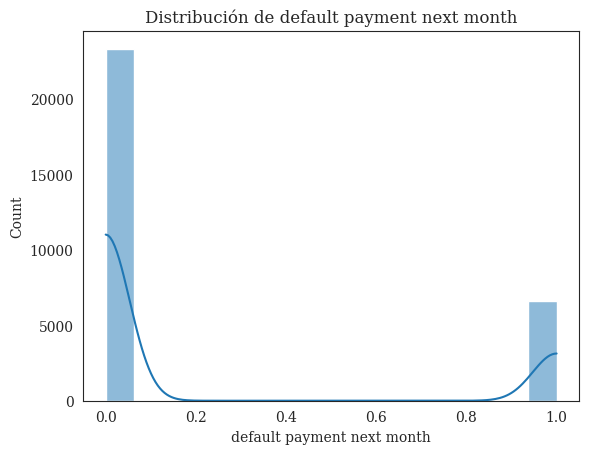

In [23]:
#Graficar histogramas
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribución de {i}')
    plt.show()

/tmp/ipython-input-24-3679661272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='default payment next month',data=df,


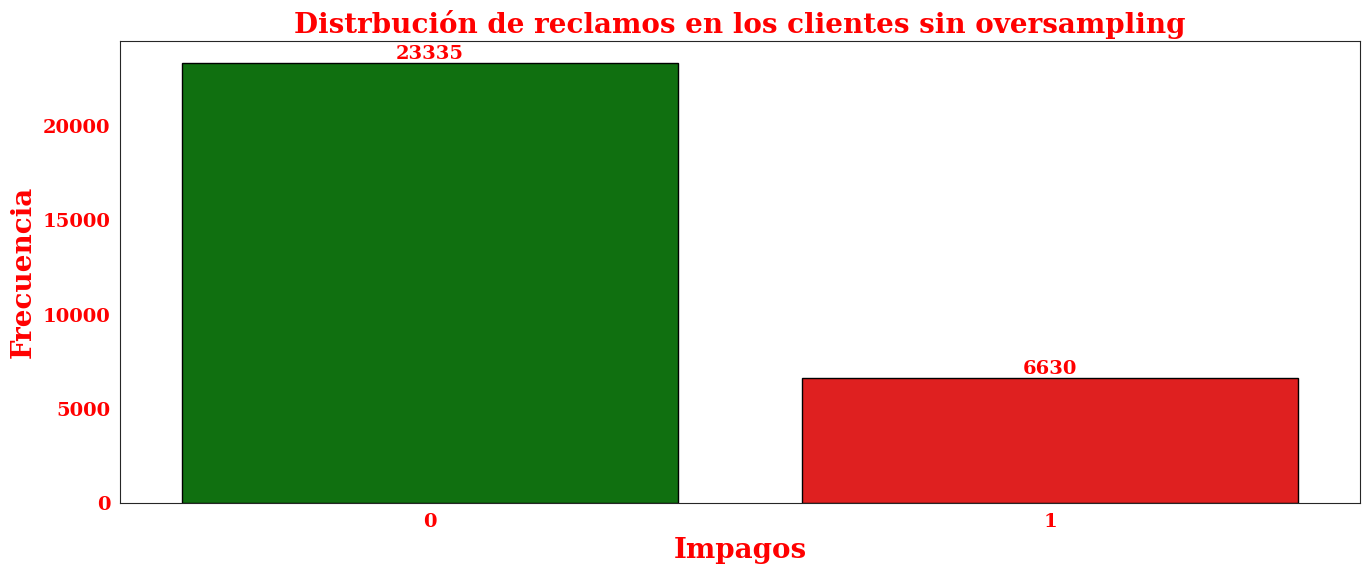

In [24]:
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'

colors = ['green', 'red']

grafica=sns.countplot(x='default payment next month',data=df,
                      palette=colors,edgecolor='black')

plt.xlabel('Impagos',fontsize = 20,
           color = 'red',fontweight='bold')

plt.ylabel('Frecuencia',fontsize = 20,
           color = 'red',fontweight='bold')

plt.xticks(fontsize=14, color='red',fontweight='bold')
plt.yticks(fontsize=14, color='red',fontweight='bold')
#
plt.title('Distrbución de reclamos en los clientes sin oversampling',
          fontsize = 20,
          color = 'red',fontweight='bold')

for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='red',fontweight='bold')

grafica.set_facecolor("white")

plt.show()

In [25]:
# Calcular el ratio de desequilibrio
r=df['default payment next month'].value_counts()

ratio = r[0] / r[1]

round(ratio,4)

np.float64(3.5196)

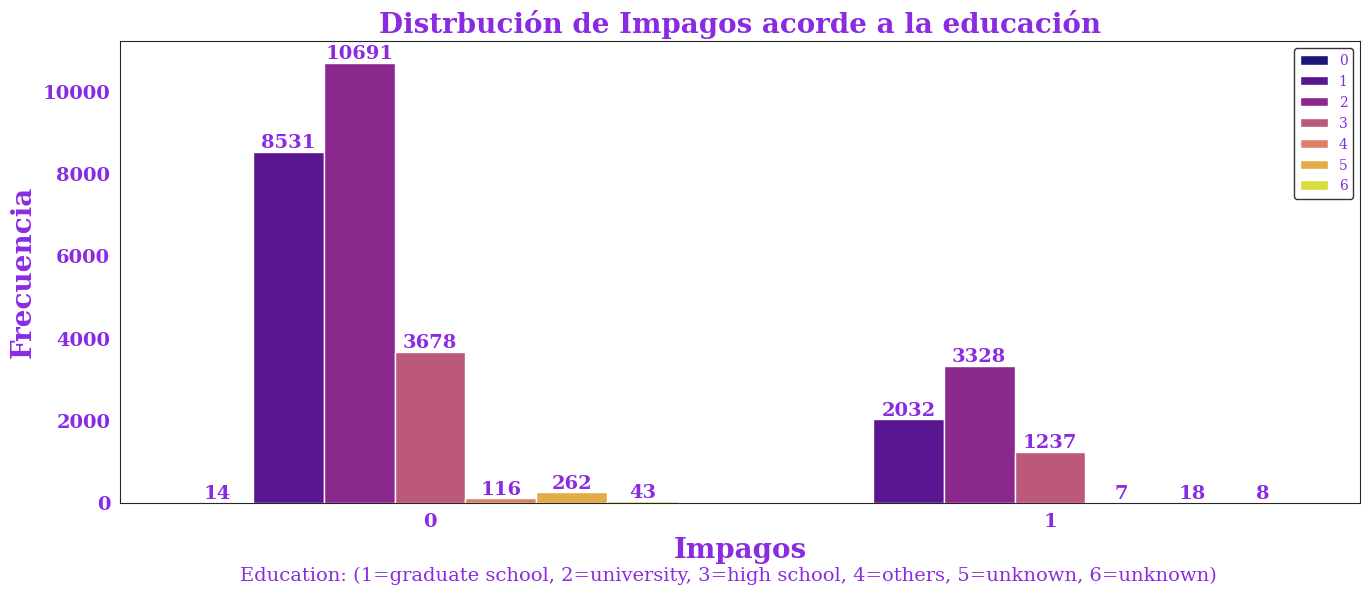

In [26]:
plt.figure(figsize=(16,6), facecolor="white")

plt.rcParams['font.family'] = 'DejaVu Serif'

colors = ['lime', 'red','orange']

grafica=sns.countplot(x='default payment next month',data=df, hue='EDUCATION',
                      palette='plasma' ,edgecolor='white')

plt.xlabel('Impagos',fontsize = 20,
           color = 'blueviolet',fontweight='bold')

plt.ylabel('Frecuencia',fontsize = 20,
           color = 'blueviolet',fontweight='bold')

plt.xticks(fontsize=14, color='blueviolet',fontweight='bold')
plt.yticks(fontsize=14, color='blueviolet',fontweight='bold')


plt.title('Distrbución de Impagos acorde a la educación',fontsize = 20,
          color = 'blueviolet',fontweight='bold')


for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='blueviolet',fontweight='bold')

plt.legend(
           facecolor='white',
           edgecolor='black',
           labelcolor='blueviolet',
           title_fontsize=12)


plt.figtext(0.20, -0.02,
            "Education: (1=graduate school, 2=university, "
            "3=high school, 4=others, 5=unknown, 6=unknown)",
            fontsize=14, color='blueviolet')

grafica.set_facecolor("white")

plt.show()

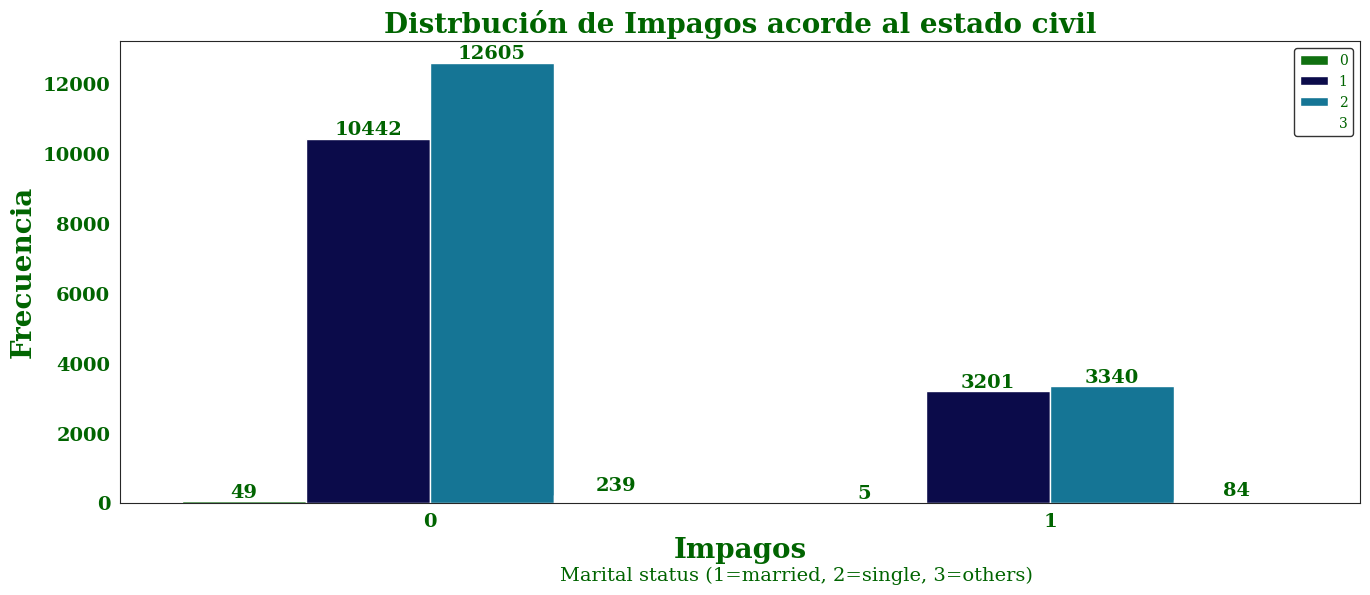

In [27]:
plt.figure(figsize=(16,6), facecolor="white")

plt.rcParams['font.family'] = 'DejaVu Serif'


grafica=sns.countplot(x='default payment next month',data=df, hue='MARRIAGE',
                      palette='ocean' ,edgecolor='white')

plt.xlabel('Impagos',fontsize = 20,
           color = 'darkgreen',fontweight='bold')

plt.ylabel('Frecuencia',fontsize = 20,
           color = 'darkgreen',fontweight='bold')

plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')


plt.title('Distrbución de Impagos acorde al estado civil',fontsize = 20,
          color = 'darkgreen',fontweight='bold')


for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='darkgreen',fontweight='bold')

plt.legend(
           facecolor='white',
           edgecolor='black',
           labelcolor='darkgreen',
           title_fontsize=12)


plt.figtext(0.40, -0.02,
            "Marital status (1=married, 2=single, 3=others)",
            fontsize=14, color='darkgreen')

grafica.set_facecolor("white")

plt.show()

---
#**Modelado PAY_AMT4**🧠
---

●	Hint: El dataset contiene información de abril a septiembre, evita cometer “data leak” para con la variable continua a predecir.

---
##**Modelos lineales**
---

In [28]:
x_1 = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_5','PAY_6','BILL_AMT5','BILL_AMT6','PAY_AMT5','PAY_AMT6']]
y_1= df["PAY_AMT4"]
# os = SMOTE(random_state=0) # SMOTE is for classification, not regression
x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1, test_size=0.3, random_state=0)
columns = x1_train.columns

In [29]:
#Eliminar variables
#x1=x_1.drop(columns=var)

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(x_1, y_1)
#Predicciones
y1_pred = lin_reg.predict(x1_test)

print(f'Coefficients: {lin_reg.coef_}')
print("----------------------------------")
print(f'Intercept: {lin_reg.intercept_}')
print("----------------------------------")
print(f'R^2 score: {lin_reg.score(x_1, y_1)}')

Coefficients: [ 7.59251046e-03 -1.87241532e+02 -5.86833814e+01  2.86294844e+01
 -1.58994076e+01 -3.31959892e+03  2.32717776e+03  2.03788123e-01
 -1.49106713e-01  1.97962070e-01  4.27650387e-02]
----------------------------------
Intercept: 688.4481703128631
----------------------------------
R^2 score: 0.1568674991116975


In [68]:
# Evaluar
error = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print(f"Error cuadrático medio (RMSE): {np.sqrt(error):.2f}")
print(f"R^2 del modelo: {r2:.4f}")

Error cuadrático medio (RMSE): 16606.46
R^2 del modelo: 0.1373


In [31]:
x_constant = sm.add_constant(x_1)
lin_reg = sm.OLS(y_1,x_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               PAY_AMT4   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     506.6
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:42:57   Log-Likelihood:            -3.2942e+05
No. Observations:               29965   AIC:                         6.589e+05
Df Residuals:                   29953   BIC:                         6.590e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        688.4482    662.282      1.040      0.2

In [32]:
x_constant = sm.add_constant(x_1)
lin_reg = sm.OLS(y_1,x_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               PAY_AMT4   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     506.6
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:42:57   Log-Likelihood:            -3.2942e+05
No. Observations:               29965   AIC:                         6.589e+05
Df Residuals:                   29953   BIC:                         6.590e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        688.4482    662.282      1.040      0.2

Jarque-Bera test ---- statistic: 112810220.0640, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.3395, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.7188, p-value: 0.0000
Anderson-Darling test ---- statistic: 5172.6232, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29965.
  res = hypotest_fun_out(*samples, **kwds)


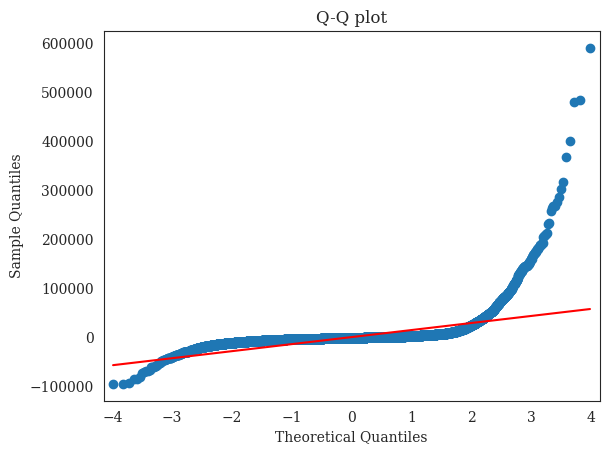

In [33]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to
    investigate the normality of residuals.

    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

normality_of_residuals_test(lin_reg)

---
##**Árboles de decisión**
---

In [34]:
#Implementación de arboles de desición
arbol1 = DecisionTreeRegressor(random_state=0)
# max_depth : = ramificaciones
arbol1.fit(x1_train, y1_train)
#Predicciones
y1_arbol1_pred = arbol1.predict(x1_test)

In [35]:
mse = mean_squared_error(y1_test, y1_arbol1_pred )
r2 = r2_score(y1_test, y1_arbol1_pred )

print(f"Error Cuadrático Medio (RMSE): {np.sqrt(mse)}")
print(f"Puntuación R-cuadrado: {r2}")

Error Cuadrático Medio (RMSE): 12762.0349882873
Puntuación R-cuadrado: 0.4904969015195384


---
##**Bosques Aleatorios**
---

In [36]:
#Implementación de arboles de desición
rfc1 = RandomForestRegressor(random_state=0)
# max_depth : = ramificaciones
rfc1.fit(x1_train, y1_train)
#Predicciones
y1_rfc1_pred = rfc1.predict(x1_test)

In [37]:
# Evaluar
error = mean_squared_error(y1_test, y1_rfc1_pred)
r2 = r2_score(y1_test, y1_rfc1_pred)
print(f"Error cuadrático medio (RMSE): {np.sqrt(error):.2f}")
print(f"R^2 del modelo: {r2:.4f}")

Error cuadrático medio (RMSE): 10635.44
R^2 del modelo: 0.6462


In [38]:
#Modelo Bosques Aleatorios
boost1 = CatBoostRegressor(random_state=0)

#Entrenar modelo
boost1.fit(x1_train, y1_train)

#Predicciones
boost1_pred = boost1.predict(x1_test)

Learning rate set to 0.066223
0:	learn: 14125.3815565	total: 52.4ms	remaining: 52.4s
1:	learn: 13654.2519554	total: 60.6ms	remaining: 30.2s
2:	learn: 13199.1721934	total: 77.2ms	remaining: 25.7s
3:	learn: 12804.1162190	total: 89.1ms	remaining: 22.2s
4:	learn: 12439.1123738	total: 104ms	remaining: 20.6s
5:	learn: 12106.9772168	total: 108ms	remaining: 17.9s
6:	learn: 11814.4567404	total: 114ms	remaining: 16.1s
7:	learn: 11523.1549447	total: 118ms	remaining: 14.6s
8:	learn: 11277.9778948	total: 122ms	remaining: 13.5s
9:	learn: 11046.9613678	total: 127ms	remaining: 12.5s
10:	learn: 10851.9323695	total: 131ms	remaining: 11.8s
11:	learn: 10638.7374934	total: 137ms	remaining: 11.2s
12:	learn: 10457.8331561	total: 141ms	remaining: 10.7s
13:	learn: 10285.0908945	total: 145ms	remaining: 10.2s
14:	learn: 10136.1788818	total: 150ms	remaining: 9.82s
15:	learn: 10004.5499165	total: 154ms	remaining: 9.46s
16:	learn: 9885.7637004	total: 160ms	remaining: 9.26s
17:	learn: 9759.0363926	total: 164ms	remai

In [39]:
# Evaluar
error = mean_squared_error(y1_test, boost1_pred)
r2 = r2_score(y1_test, boost1_pred)
print(f"Error cuadrático medio (RMSE): {np.sqrt(error):.2f}")
print(f"R^2 del modelo: {r2:.4f}")

Error cuadrático medio (RMSE): 11035.33
R^2 del modelo: 0.6190


---
#**Modelado default payment next month**🧠
---

---
##**Oversampling**
---

In [40]:
x = df.loc[:, df.columns != "default payment next month"]
y = df["default payment next month"]

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

In [41]:
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ["default payment next month"])

In [42]:
x = os_data_x
y = os_data_y

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

---
##**Modelos lineales**
---

In [44]:
#Modelo
logit= LogisticRegression()
logit.fit(x_train,y_train)
#Predicciones
logit_pred = logit.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
##**Modelos basados en boosting**
---

In [45]:
#Modelo Bosques Aleatorios
boost = CatBoostClassifier(random_state=0)

#Entrenar modelo
boost.fit(x_train, y_train)

#Predicciones
boost_pred = boost.predict(x_test)

Learning rate set to 0.039185
0:	learn: 0.6815998	total: 34.9ms	remaining: 34.9s
1:	learn: 0.6703389	total: 62.5ms	remaining: 31.2s
2:	learn: 0.6587989	total: 103ms	remaining: 34.4s
3:	learn: 0.6499088	total: 138ms	remaining: 34.3s
4:	learn: 0.6389538	total: 171ms	remaining: 34s
5:	learn: 0.6298543	total: 218ms	remaining: 36s
6:	learn: 0.6215693	total: 251ms	remaining: 35.6s
7:	learn: 0.6149733	total: 290ms	remaining: 35.9s
8:	learn: 0.6086727	total: 316ms	remaining: 34.8s
9:	learn: 0.6019882	total: 345ms	remaining: 34.2s
10:	learn: 0.5962284	total: 385ms	remaining: 34.6s
11:	learn: 0.5901222	total: 420ms	remaining: 34.6s
12:	learn: 0.5851544	total: 458ms	remaining: 34.8s
13:	learn: 0.5805889	total: 487ms	remaining: 34.3s
14:	learn: 0.5770193	total: 525ms	remaining: 34.5s
15:	learn: 0.5736403	total: 561ms	remaining: 34.5s
16:	learn: 0.5693493	total: 586ms	remaining: 33.9s
17:	learn: 0.5656604	total: 630ms	remaining: 34.4s
18:	learn: 0.5613631	total: 669ms	remaining: 34.5s
19:	learn: 0.

---
##**Redes neuronales**
---

In [46]:
#Modelo Bosques Aleatorios
mlp = MLPClassifier(random_state=0)

#Entrenar modelo
mlp.fit(x_train, y_train)

#Predicciones
mlp_pred = mlp.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---
##**Árboles de decisión**
---

In [47]:
#Implementación de arboles de desición
arbol = DecisionTreeClassifier(max_depth=3)
# max_depth : = ramificaciones
arbol.fit(x_train, y_train)
#Predicciones
y_arbol_pred = arbol.predict(x_test)

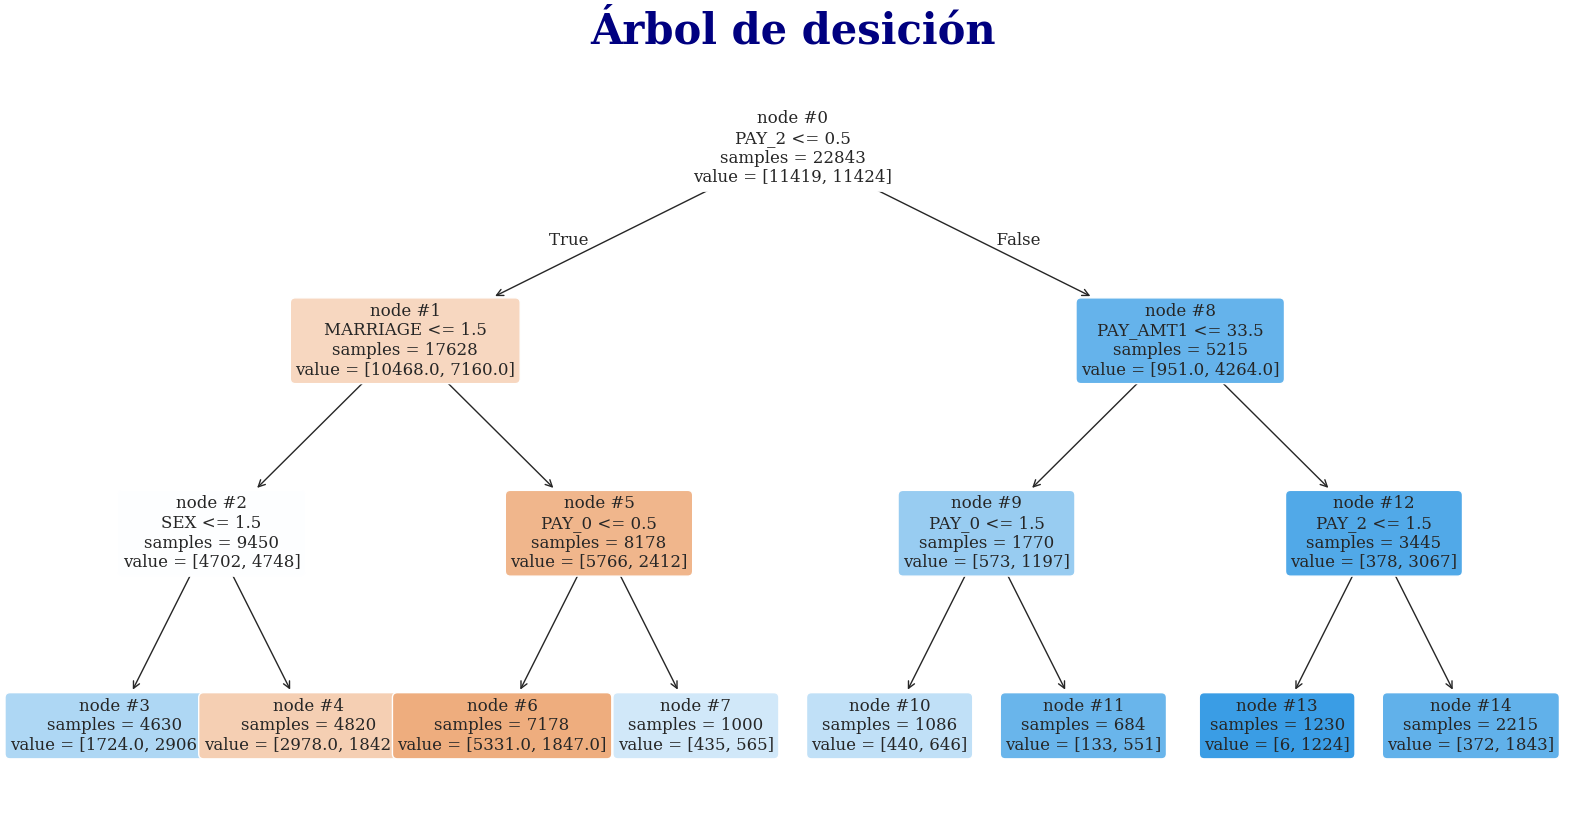

In [48]:
#Gráfica
plt.figure(figsize=(20,10))
plot_tree(arbol, feature_names=x.columns.tolist(),
          impurity=False, node_ids=True,
          rounded=True, precision=4,
          filled=True, fontsize=12)

plt.title('Árbol de desición',fontsize = 30,
          color = 'navy',fontweight='bold')
plt.show()

---
##**Bosques Aleatorios**
---

In [49]:
#Modelo Bosques Aleatorios
rfc = RandomForestClassifier(random_state=0)

#Entrenar modelo
rfc.fit(x_train, y_train)

#Predicciones
yrfc_pred = rfc.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


---
# **Evaluación default payment next month**📈
---

In [50]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, boost_pred))
print("Reporte de Clasificación MLP:")
print(classification_report(y_test, boost_pred))

Accuracy: 0.8208558880604637
Reporte de Clasificación MLP:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4898
           1       0.84      0.80      0.82      4893

    accuracy                           0.82      9791
   macro avg       0.82      0.82      0.82      9791
weighted avg       0.82      0.82      0.82      9791



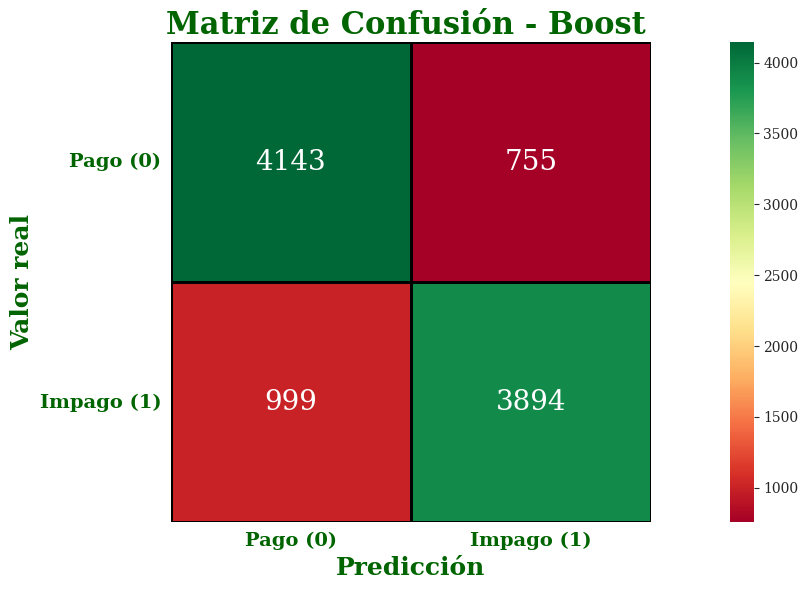

In [51]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, boost_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='RdYlGn',
    linewidths=1,
    linecolor='black',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')

plt.xticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'])
plt.yticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Boost ',
          fontsize = 22, color = 'darkgreen',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='darkgreen',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='darkgreen',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

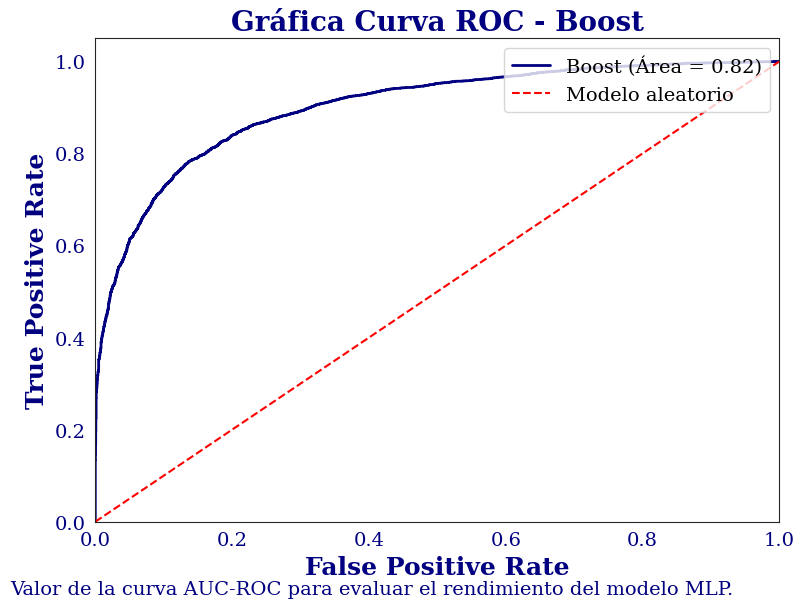

In [52]:
#Area bajo la curva
boost_roc_auc = roc_auc_score(y_test, boost.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_boost, tpr_boost, thresholds = roc_curve(y_test, boost.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('white')

# Curva ROC
ax.plot(fpr_boost, tpr_boost,
        color='navy', linewidth=2,
        linestyle='solid',
         label='Boost (Área = %0.2f)' % boost_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='white', labelcolor='black')

# Título y etiquetas con color navy
ax.set_title('Gráfica Curva ROC - Boost',
             fontsize=20, color='navy', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='navy', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='navy', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='navy', labelsize=14)
ax.tick_params(axis='y', colors='navy', labelsize=14)

# Texto interpretativo debajo
fig.text(0.0, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento "
         "del modelo MLP.",
         fontsize=14, color='navy')
#Mostrar gráfico
plt.tight_layout()
plt.show()

---
##**Redes neuronales**
---

In [53]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("Reporte de Clasificación MLP:")
print(classification_report(y_test, mlp_pred))

Accuracy: 0.6271065264017975
Reporte de Clasificación MLP:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      4898
           1       0.62      0.65      0.63      4893

    accuracy                           0.63      9791
   macro avg       0.63      0.63      0.63      9791
weighted avg       0.63      0.63      0.63      9791



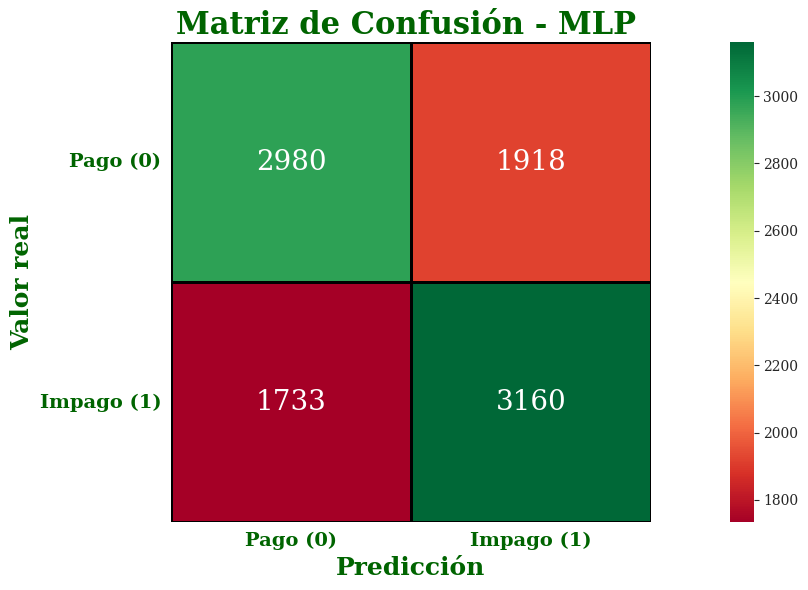

In [54]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, mlp_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='RdYlGn',
    linewidths=1,
    linecolor='black',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')

plt.xticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'])
plt.yticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - MLP ',
          fontsize = 22, color = 'darkgreen',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='darkgreen',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='darkgreen',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

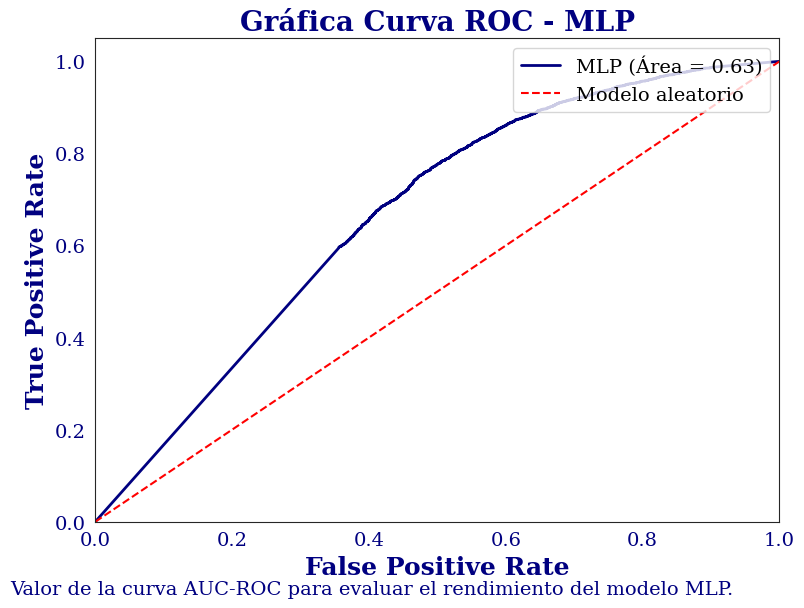

In [55]:
#Area bajo la curva
mlp_roc_auc = roc_auc_score(y_test, mlp.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('white')

# Curva ROC
ax.plot(fpr_mlp, tpr_mlp,
        color='navy', linewidth=2,
        linestyle='solid',
         label='MLP (Área = %0.2f)' % mlp_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='white', labelcolor='black')

# Título y etiquetas con color navy
ax.set_title('Gráfica Curva ROC - MLP',
             fontsize=20, color='navy', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='navy', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='navy', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='navy', labelsize=14)
ax.tick_params(axis='y', colors='navy', labelsize=14)

# Texto interpretativo debajo
fig.text(0.0, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento "
         "del modelo MLP.",
         fontsize=14, color='navy')
#Mostrar gráfico
plt.tight_layout()
plt.show()

---
##**Modelos lineales**
---

In [56]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, logit_pred))
print("Reporte de Clasificación Modelo Logit:")
print(classification_report(y_test, logit_pred))

Accuracy: 0.6118884690021448
Reporte de Clasificación Modelo Logit:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      4898
           1       0.64      0.51      0.57      4893

    accuracy                           0.61      9791
   macro avg       0.62      0.61      0.61      9791
weighted avg       0.62      0.61      0.61      9791



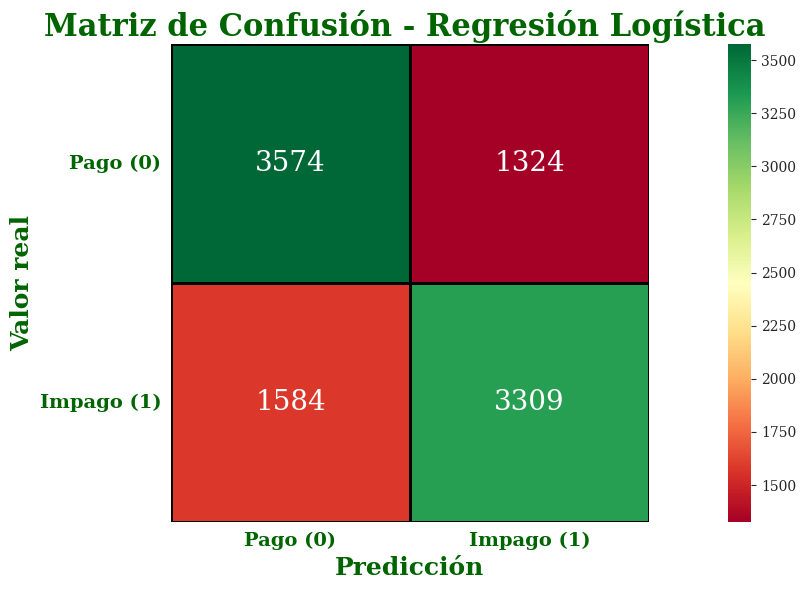

In [57]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_arbol_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='RdYlGn',
    linewidths=1,
    linecolor='black',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')

plt.xticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'])
plt.yticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Regresión Logística ',
          fontsize = 22, color = 'darkgreen',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='darkgreen',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='darkgreen',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

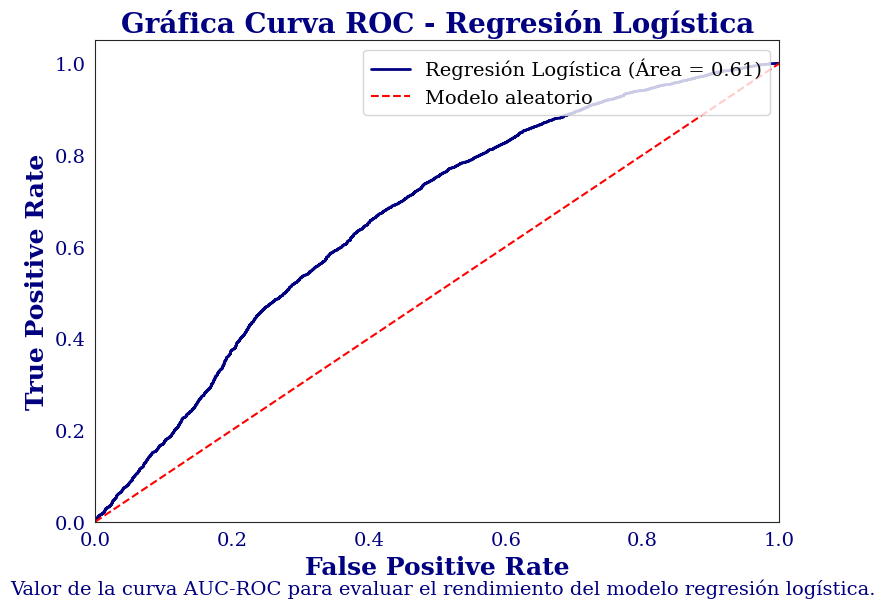

In [58]:
#Area bajo la curva
logit_roc_auc = roc_auc_score(y_test, logit.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_logit, tpr_logit, thresholds = roc_curve(y_test, logit.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('white')

# Curva ROC
ax.plot(fpr_logit, tpr_logit,
        color='navy', linewidth=2,
        linestyle='solid',
         label='Regresión Logística (Área = %0.2f)' % logit_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='white', labelcolor='black')

# Título y etiquetas con color navy
ax.set_title('Gráfica Curva ROC - Regresión Logística',
             fontsize=20, color='navy', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='navy', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='navy', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='navy', labelsize=14)
ax.tick_params(axis='y', colors='navy', labelsize=14)

# Texto interpretativo debajo
fig.text(0.0, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento "
         "del modelo regresión logística.",
         fontsize=14, color='navy')
#Mostrar gráfico
plt.tight_layout()
plt.show()


---
##**Árboles de decisión**
---

In [59]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, y_arbol_pred))
print("Reporte de Clasificación Modelo Árboles de decisión:")
print(classification_report(y_test, y_arbol_pred))

Accuracy: 0.7029925441732203
Reporte de Clasificación Modelo Árboles de decisión:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      4898
           1       0.71      0.68      0.69      4893

    accuracy                           0.70      9791
   macro avg       0.70      0.70      0.70      9791
weighted avg       0.70      0.70      0.70      9791



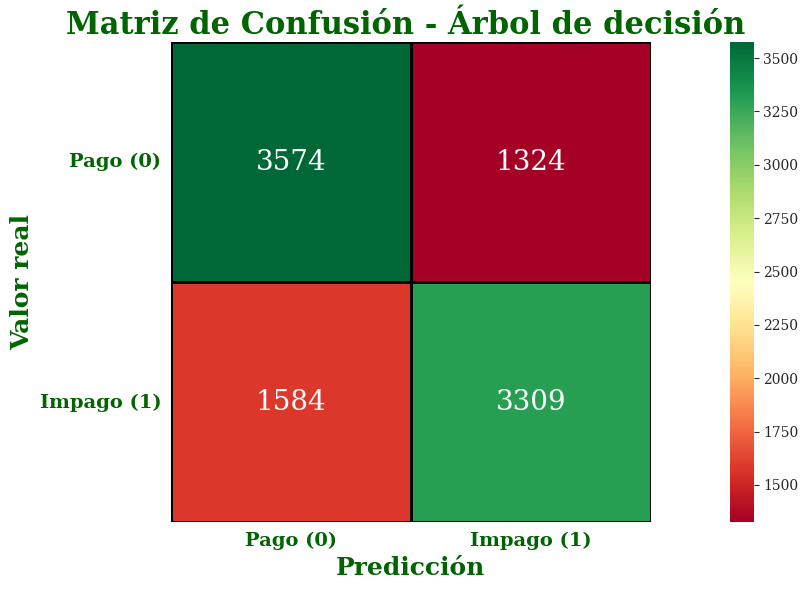

In [60]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_arbol_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='RdYlGn',
    linewidths=1,
    linecolor='black',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')

plt.xticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'])
plt.yticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Árbol de decisión ',
          fontsize = 22, color = 'darkgreen',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='darkgreen',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='darkgreen',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

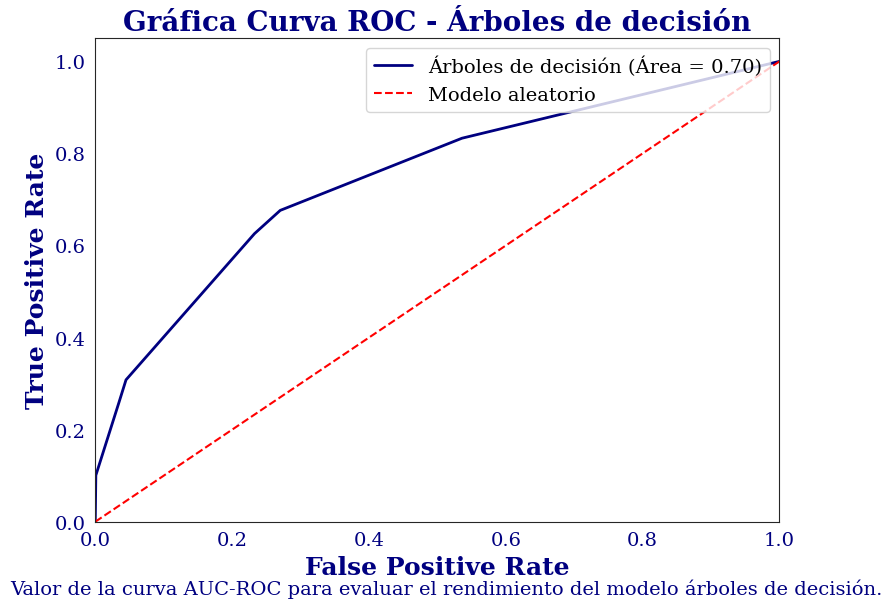

In [61]:
#Area bajo la curva
arbol_roc_auc = roc_auc_score(y_test, arbol.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_arbol, tpr_arbol, thresholds = roc_curve(y_test, arbol.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('white')

# Curva ROC
ax.plot(fpr_arbol, tpr_arbol,
        color='navy', linewidth=2,
        linestyle='solid',
         label='Árboles de decisión (Área = %0.2f)' % arbol_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='white', labelcolor='black')

# Título y etiquetas con color navy
ax.set_title('Gráfica Curva ROC - Árboles de decisión',
             fontsize=20, color='navy', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='navy', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='navy', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='navy', labelsize=14)
ax.tick_params(axis='y', colors='navy', labelsize=14)

# Texto interpretativo debajo
fig.text(0.0, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento "
         "del modelo árboles de decisión.",
         fontsize=14, color='navy')
#Mostrar gráfico
plt.tight_layout()
plt.show()


---
##**Bosques Aleatorios**
---

In [62]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, yrfc_pred))
print("Reporte de Clasificación Modelo Random Forest:")
print(classification_report(y_test, yrfc_pred))

Accuracy: 0.8392401184761515
Reporte de Clasificación Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      4898
           1       0.85      0.82      0.84      4893

    accuracy                           0.84      9791
   macro avg       0.84      0.84      0.84      9791
weighted avg       0.84      0.84      0.84      9791



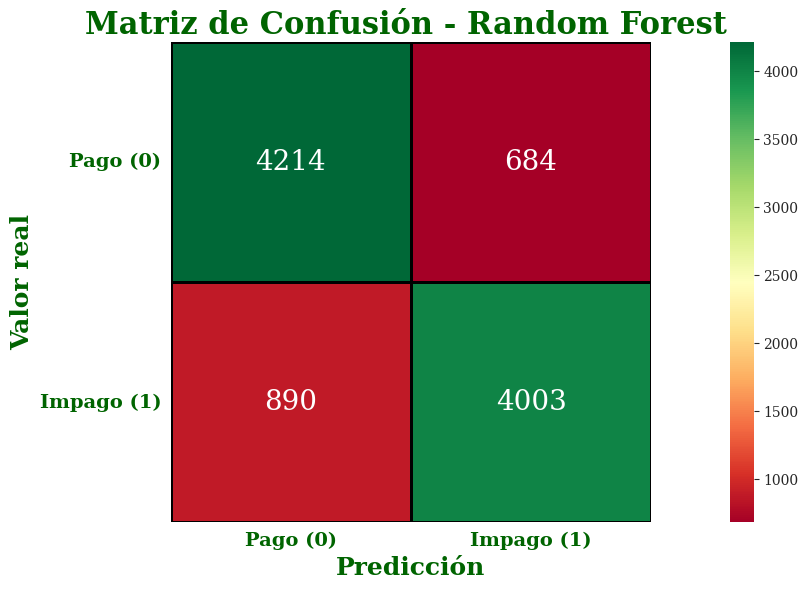

In [63]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, yrfc_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='RdYlGn',
    linewidths=1,
    linecolor='black',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='darkgreen',fontweight='bold')
plt.yticks(fontsize=14, color='darkgreen',fontweight='bold')

plt.xticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'])
plt.yticks([0.5, 1.5], ['Pago (0)', 'Impago (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Random Forest ',
          fontsize = 22, color = 'darkgreen',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='darkgreen',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='darkgreen',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

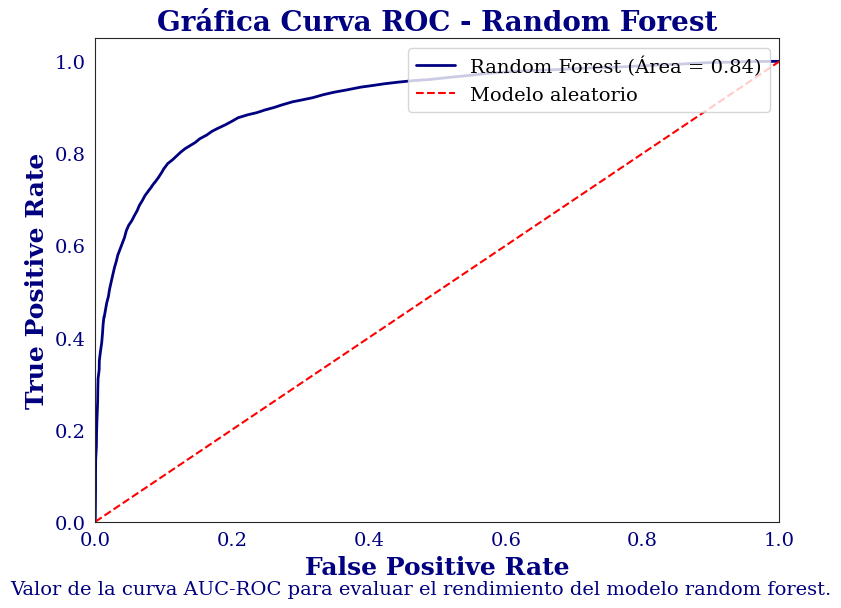

In [64]:
#Area bajo la curva
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('white')

# Curva ROC
ax.plot(fpr_rfc, tpr_rfc,
        color='navy', linewidth=2,
        linestyle='solid',
         label='Random Forest (Área = %0.2f)' % rfc_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='white', labelcolor='black')

# Título y etiquetas con color navy
ax.set_title('Gráfica Curva ROC - Random Forest',
             fontsize=20, color='navy', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='navy', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='navy', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='navy', labelsize=14)
ax.tick_params(axis='y', colors='navy', labelsize=14)

# Texto interpretativo debajo
fig.text(0.0, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento "
         "del modelo random forest.",
         fontsize=14, color='navy')
#Mostrar gráfico
plt.tight_layout()
plt.show()


In [65]:
#Importar variables con más impacto
variables_mas_impacto = rfc.feature_importances_

# Create DataFrame para guarda variables
variables_mas_impacto_df = pd.DataFrame({'Variable': x_test.columns,
                                     'GINI': variables_mas_impacto}
                                    )
#Ordenar descendentemente
variables_mas_impacto_df = variables_mas_impacto_df.sort_values(
                                by='GINI',
                                ascending=False).reset_index(drop=True)

#Mostar DataFrame
var_imp=variables_mas_impacto_df .nlargest(15, 'GINI')
var_imp

Variable      GINI
0       PAY_0  0.070570
1       PAY_2  0.059596
2   LIMIT_BAL  0.058327
3    PAY_AMT1  0.057762
4   BILL_AMT1  0.057311
5         AGE  0.052174
6    PAY_AMT2  0.049596
7   BILL_AMT2  0.049049
8    PAY_AMT3  0.046842
9    PAY_AMT4  0.045870
10   PAY_AMT6  0.045379
11  BILL_AMT3  0.044949
12  BILL_AMT4  0.043114
13   PAY_AMT5  0.042925
14  BILL_AMT6  0.042755

/tmp/ipython-input-66-2764242466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.barplot(x='GINI',data=var_imp,


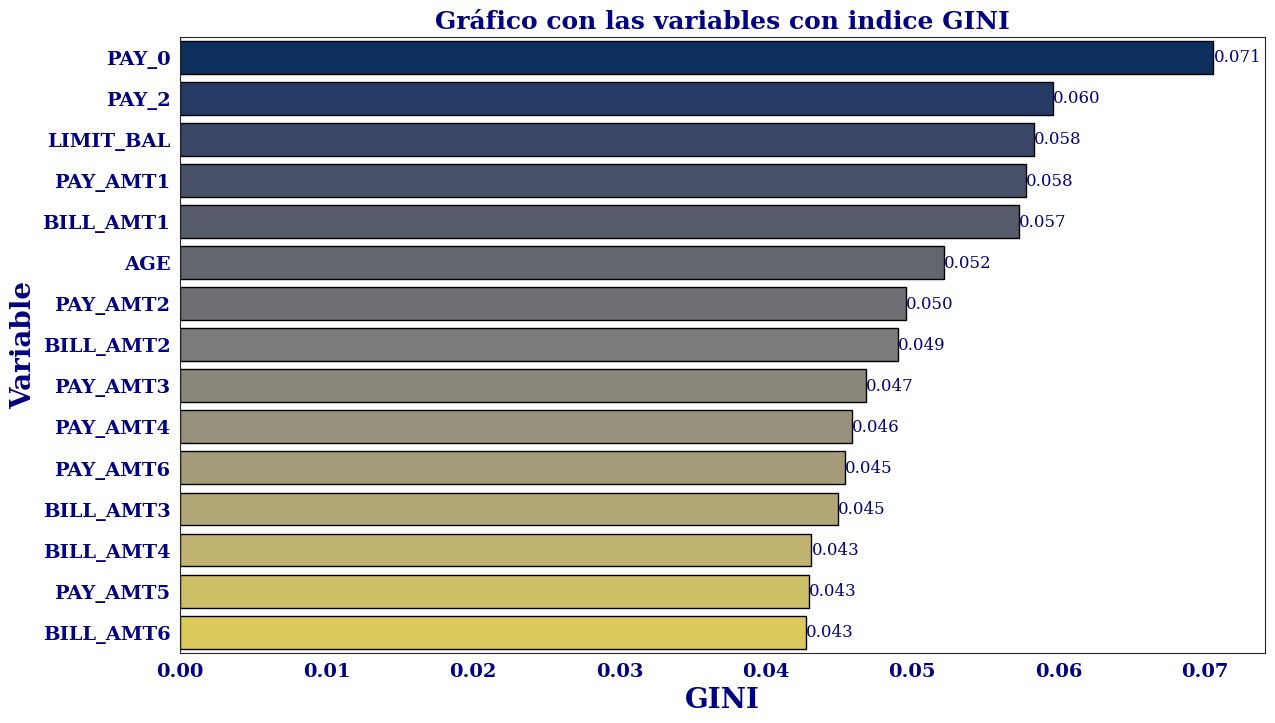

In [66]:
plt.figure(figsize=(14,8), facecolor="white")
plt.rcParams['font.family'] = 'DejaVu Serif'
grafica=sns.barplot(x='GINI',data=var_imp,
                    y='Variable',
                    palette='cividis',
                    edgecolor='black')

plt.xlabel('GINI',fontsize = 20,
           color = 'navy',fontweight='bold')


plt.ylabel('Variable',fontsize = 20,
           color = 'navy',fontweight='bold')


plt.xticks(fontsize=14, color='navy',fontweight='bold')
plt.yticks(fontsize=14, color='navy',fontweight='bold')

plt.title('Gráfico con las variables con indice GINI',
          fontsize = 18, color = 'navy',fontweight='bold')


for container in grafica.containers:
    etiquetas = [f'{bar.get_width():.3f}' for bar in container]
    grafica.bar_label(container, labels=etiquetas, fontsize=12, color='navy')

grafica.set_facecolor("white")

plt.show()

---
#**Conclusiones a nivel técnico y a nivel de negocio**📌
---



*   El modelo de regresión no es óptimo para este tipo de datos se ajuste a mejor a modelos robustos

* Las predicciones de random forest classifier tienen mayor confiabilidad que el resto de modelos

* Se debe usar oversampling para evitar problemas con desbalance de clases

* Es recomendable eliminar variables altamente correlacionadas
Evita cometer “data leak” para PAY_AMT4




Codigo elaborado por Morales Francisco [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)